In [1]:
# Copyright (c) 2022 Oracle and/or its affiliates.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import cx_Oracle
import os
import pandas as pd
import yaml
wallet_location = '/home/ubuntu/wallets/forzaf1'

os.environ['TNS_ADMIN'] = wallet_location

!echo $TNS_ADMIN

/home/ubuntu/wallets/forzaf1


In [2]:
os.environ['PATH']='/home/ubuntu/miniconda3/bin:$PATH'

In [ ]:
!python -m pip install -U pip
!python -m pip install -U setuptools wheel
!python -m pip install -U "mxnet<2.0.0"
!python -m pip install autogluon
!pip install dataprep
!pip install dask
!pip install pandas_profiling
## install packages
!pip install -q scikit-learn
!pip install ipywidgets
!pip install sweetviz

In [4]:
def process_yaml():
	with open("formulahack.yaml") as file:
		return yaml.safe_load(file)

class OracleATPDatabaseConnection:
    def __init__(self, data=process_yaml()):
        # wallet location (default is HOME/wallets/wallet_X)
        print(os.environ['TNS_ADMIN'])
        self.pool = cx_Oracle.SessionPool(data['db']['username'], data['db']['password'], data['db']['dsn'],
            min=1, max=4, increment=1, threaded=True,
            getmode=cx_Oracle.SPOOL_ATTRVAL_WAIT
        )
        print('Connection successful.')



    def close_pool(self):
        self.pool.close()
        print('Connection pool closed.')



    def insert(self, cursor_object):
        connection = self.pool.acquire()
        connection.autocommit = True
        cursor = connection.cursor()

        try:
            # print(sql_insert)
            cursor.execute(cursor_object)
            print('[DBG] INSERT {} OK'.format(cursor_object))
        except Exception as e:
            print('[DBG] INSERT ERR: {}'.format(e))

        self.pool.release(connection)
        return 1


    # select
    def select(self, query_sql):
        assert 'select' in query_sql.lower()
        connection = self.pool.acquire()
        connection.autocommit = True
        cursor = connection.cursor()
        return_list = list()
        try:
            cursor.execute(query_sql)
            print('[DBG] SELECT OK')
        except Exception as e:
            print('[DBG] SELECT ERR {}'.format(e))

        rows = cursor.fetchall()
        if rows:
            for x in rows:
                return_list.append(x)
        self.pool.release(connection)
        return return_list


    # update
    def update(self, query_sql, row, debug=None):
        assert 'update' in query_sql.lower()
        connection = self.pool.acquire()
        connection.autocommit = True
        cursor = connection.cursor()
        try:
            cursor.execute(query_sql, row)
            if debug:
                print('[DBG][{}] UPDATE {} OK'.format(debug, row))
            else:
                print('[DBG] UPDATE {} OK'.format(row))
        except Exception as e:
            if debug:  
                print('[DBG][{}] UPDATE ERR {}'.format(debug, e))
            else:
                print('[DBG] UPDATE ERR {}'.format(e))

        self.pool.release(connection)
        return 1
    

    def get_connection(self):
        connection = self.pool.acquire()
        connection.autocommit = True
        return connection

In [5]:
atp = OracleATPDatabaseConnection()

/home/ubuntu/wallets/forzaf1
Connection successful.


In [6]:
query = 'SELECT * from admin.f1_2021_weather_view'
data_test = pd.read_sql(query, con=atp.get_connection())
data_test.head(5)

M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE  M_TIME_OFFSET  \
0                                          0              0   
1                                          0              0   
2                                          0              0   
3                                          0              0   
4                                          0              0   

   M_WEATHER_FORECAST_SAMPLES_M_WEATHER  M_TRACK_TEMPERATURE_CHANGE  \
0                                     0                           0   
1                                     0                           0   
2                                     0                           0   
3                                     0                           0   
4                                     0                           0   

      TIMESTAMP  M_TRACK_TEMPERATURE  M_GAME_PAUSED  M_FORECAST_ACCURACY  \
0  1.642275e+09                   33              0                    0   
1  1.642275e+09                   33              0                    0   
2  1.642275e+09                   33              0                    0   
3  1.642275e+09                   33              0                    0   
4  1.642275e+09                   33              0                    0   

   M_AIR_TEMPERATURE  M_NUM_WEATHER_FORECAST_SAMPLES  ...  M_WEATHER  \
0                 25                               0  ...          0   
1                 25                               0  ...          0   
2                 25                               0  ...          0   
3                 25                               0  ...          0   
4                 25                               0  ...          0   

   M_AI_DIFFICULTY  M_PIT_SPEED_LIMIT  M_NETWORK_GAME  M_TOTAL_LAPS  \
0                0                 80               0           200   
1                0                 80               0           200   
2                0                 80               0           200   
3                0                 80               0           200   
4                0                 80               0           200   

   M_STEERING_ASSIST  M_IS_SPECTATING  M_DYNAMIC_RACING_LINE  M_DRSASSIST  \
0                  0                0                      0            0   
1                  0                0                      0            0   
2                  0                0                      0            0   
3                  0                0                      0            0   
4                  0                0                      0            0   

   M_NUM_MARSHAL_ZONES  
0                   16  
1                   16  
2                   16  
3                   16  
4                   16  

[5 rows x 40 columns]

In [7]:
print(len(data_test))

8045296


In [8]:
query = 'SELECT * from admin.f1_2021_weather_view_full'
data_test = pd.read_sql(query, con=atp.get_connection())
data_test.head(5)

M_PACKET_FORMAT  M_GAME_MAJOR_VERSION  M_GAME_MINOR_VERSION  \
0             2021                     1                    14   
1             2021                     1                    14   
2             2021                     1                    14   
3             2021                     1                    14   
4             2021                     1                    14   

   M_PACKET_VERSION  M_PACKET_ID        M_SESSION_UID  M_SESSION_TIME  \
0                 1            1  4360147878372829309         108.817   
1                 1            1  4360147878372829309         108.817   
2                 1            1  4360147878372829309         108.817   
3                 1            1  4360147878372829309         108.817   
4                 1            1  4360147878372829309         108.817   

   M_FRAME_IDENTIFIER  M_PLAYER_CAR_INDEX  M_SECONDARY_PLAYER_CAR_INDEX  ...  \
0                2106                   2                           255  ...   
1                2106                   2                           255  ...   
2                2106                   2                           255  ...   
3                2106                   2                           255  ...   
4                2106                   2                           255  ...   

   M_WEATHER  M_AI_DIFFICULTY  M_PIT_SPEED_LIMIT  M_NETWORK_GAME  \
0          0               41                 60               1   
1          0               41                 60               1   
2          0               41                 60               1   
3          0               41                 60               1   
4          0               41                 60               1   

   M_TOTAL_LAPS  M_STEERING_ASSIST  M_IS_SPECTATING  M_DYNAMIC_RACING_LINE  \
0             5                  1                0                      2   
1             5                  1                0                      2   
2             5                  1                0                      2   
3             5                  1                0                      2   
4             5                  1                0                      2   

   M_DRSASSIST  M_NUM_MARSHAL_ZONES  
0            1                   17  
1            1                   17  
2            1                   17  
3            1                   17  
4            1                   17  

[5 rows x 58 columns]

In [9]:
data_test.describe()

M_PACKET_FORMAT  M_GAME_MAJOR_VERSION  M_GAME_MINOR_VERSION  \
count       11062282.0            11062282.0            11062282.0   
mean            2021.0                   1.0                  14.0   
std                0.0                   0.0                   0.0   
min             2021.0                   1.0                  14.0   
25%             2021.0                   1.0                  14.0   
50%             2021.0                   1.0                  14.0   
75%             2021.0                   1.0                  14.0   
max             2021.0                   1.0                  14.0   

       M_PACKET_VERSION  M_PACKET_ID  M_SESSION_UID  M_SESSION_TIME  \
count        11062282.0   11062282.0   1.106228e+07    1.106228e+07   
mean                1.0          1.0   8.651187e+18    8.788952e+02   
std                 0.0          0.0   5.215626e+18    1.574334e+03   
min                 1.0          1.0   3.168741e+15    4.000000e-03   
25%                 1.0          1.0   3.745645e+18    6.885900e+01   
50%                 1.0          1.0   8.818562e+18    2.847565e+02   
75%                 1.0          1.0   1.317187e+19    8.815410e+02   
max                 1.0          1.0   1.835659e+19    9.783061e+03   

       M_FRAME_IDENTIFIER  M_PLAYER_CAR_INDEX  M_SECONDARY_PLAYER_CAR_INDEX  \
count        1.106228e+07        1.106228e+07                    11062282.0   
mean         2.620749e+04        1.342989e+01                         255.0   
std          5.209130e+04        2.188733e+01                           0.0   
min          0.000000e+00        0.000000e+00                         255.0   
25%          1.902000e+03        1.000000e+00                         255.0   
50%          7.855000e+03        1.900000e+01                         255.0   
75%          2.601600e+04        1.900000e+01                         255.0   
max          3.362990e+05        2.550000e+02                         255.0   

       ...     M_WEATHER  M_AI_DIFFICULTY  M_PIT_SPEED_LIMIT  M_NETWORK_GAME  \
count  ...  1.106228e+07     1.106228e+07       1.106228e+07    1.106228e+07   
mean   ...  2.679131e-01     6.490188e+01       7.891707e+01    2.870965e-01   
std    ...  6.309880e-01     3.866394e+01       4.526128e+00    4.524070e-01   
min    ...  0.000000e+00     0.000000e+00       6.000000e+01    0.000000e+00   
25%    ...  0.000000e+00     3.100000e+01       8.000000e+01    0.000000e+00   
50%    ...  0.000000e+00     9.000000e+01       8.000000e+01    0.000000e+00   
75%    ...  0.000000e+00     9.000000e+01       8.000000e+01    1.000000e+00   
max    ...  5.000000e+00     1.100000e+02       8.000000e+01    1.000000e+00   

       M_TOTAL_LAPS  M_STEERING_ASSIST  M_IS_SPECTATING  \
count  1.106228e+07       1.106228e+07     1.106228e+07   
mean   1.658906e+02       1.045898e-01     1.326688e-02   
std    6.990585e+01       3.060242e-01     1.144154e-01   
min    5.000000e+00       0.000000e+00     0.000000e+00   
25%    2.000000e+02       0.000000e+00     0.000000e+00   
50%    2.000000e+02       0.000000e+00     0.000000e+00   
75%    2.000000e+02       0.000000e+00     0.000000e+00   
max    2.000000e+02       1.000000e+00     1.000000e+00   

       M_DYNAMIC_RACING_LINE   M_DRSASSIST  M_NUM_MARSHAL_ZONES  
count           1.106228e+07  1.106228e+07         1.106228e+07  
mean            3.826375e-01  1.913188e-01         1.631444e+01  
std             7.866788e-01  3.933394e-01         9.749482e-01  
min             0.000000e+00  0.000000e+00         1.000000e+01  
25%             0.000000e+00  0.000000e+00         1.600000e+01  
50%             0.000000e+00  0.000000e+00         1.600000e+01  
75%             0.000000e+00  0.000000e+00         1.700000e+01  
max             2.000000e+00  1.000000e+00         2.000000e+01  

[8 rows x 57 columns]

In [10]:
print(data_test.columns)

Index(['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_GAME_MINOR_VERSION',
       'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SESSION_UID', 'M_SESSION_TIME',
       'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX',
       'M_SECONDARY_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST',
       'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'TIMESTAMP',
       'M_ZONE_START', 'M_ZONE_FLAG', 'M_PIT_STOP_WINDOW_IDEAL_LAP',
       'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED',
       'M_FORECAST_ACCURACY', 'GAMEHOST', 'M_AIR_TEMPERATURE',
       'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SLI_PRO_NATIVE_SUPPORT',
       'M_SAFETY_CAR_STATUS', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA',
       'M_SEASON_LINK_IDENTIFIER', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST',
       'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_WEEKEND_LINK_IDENTIFIER',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FO

In [11]:
print(len(data_test))

11062282


In [12]:
import sweetviz as sv

#feature_config = sv.FeatureConfig(force_num=["M_WEATHER"]) # label
feature_config = sv.FeatureConfig(force_num=['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_GAME_MINOR_VERSION',
       'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SESSION_UID', 'M_SESSION_TIME',
       'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX',
       'M_SECONDARY_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST',
       'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'TIMESTAMP',
       'M_ZONE_START', 'M_ZONE_FLAG', 'M_PIT_STOP_WINDOW_IDEAL_LAP',
       'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH', 'M_GAME_PAUSED',
       'M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE',
       'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SLI_PRO_NATIVE_SUPPORT',
       'M_SAFETY_CAR_STATUS', 'M_TRACK_ID', 'M_ERSASSIST', 'M_FORMULA',
       'M_SEASON_LINK_IDENTIFIER', 'M_PIT_ASSIST', 'M_GEARBOX_ASSIST',
       'M_SESSION_TYPE', 'M_SPECTATOR_CAR_INDEX',
       'M_PIT_STOP_WINDOW_LATEST_LAP', 'M_WEEKEND_LINK_IDENTIFIER',
       'M_DYNAMIC_RACING_LINE_TYPE', 'M_SESSION_TIME_LEFT',
       'M_SESSION_DURATION', 'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET',
       'M_WEATHER_FORECAST_SAMPLES_M_WEATHER',
       'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE',
       'M_TRACK_TEMPERATURE_CHANGE',
       'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER',
       'M_AI_DIFFICULTY', 'M_PIT_SPEED_LIMIT', 'M_NETWORK_GAME',
       'M_TOTAL_LAPS', 'M_STEERING_ASSIST', 'M_IS_SPECTATING',
       'M_DYNAMIC_RACING_LINE', 'M_DRSASSIST', 'M_NUM_MARSHAL_ZONES'])


In [13]:
report = sv.analyze(data_test, target_feat='M_WEATHER', feat_cfg=feature_config)

                                             |      | [  0%]   00:00 -> (? left)


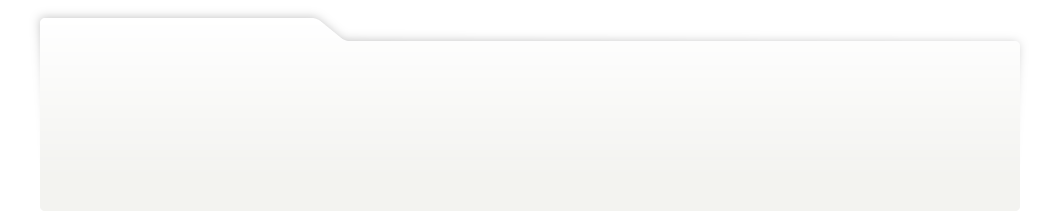
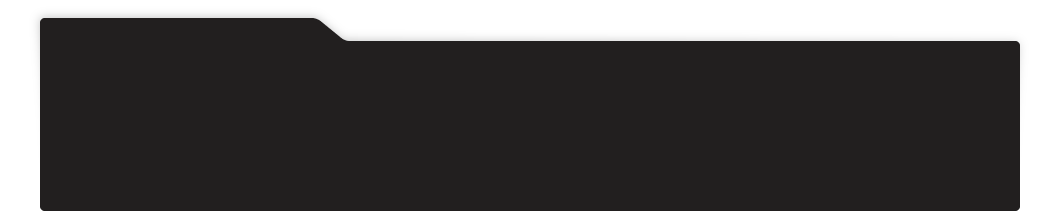
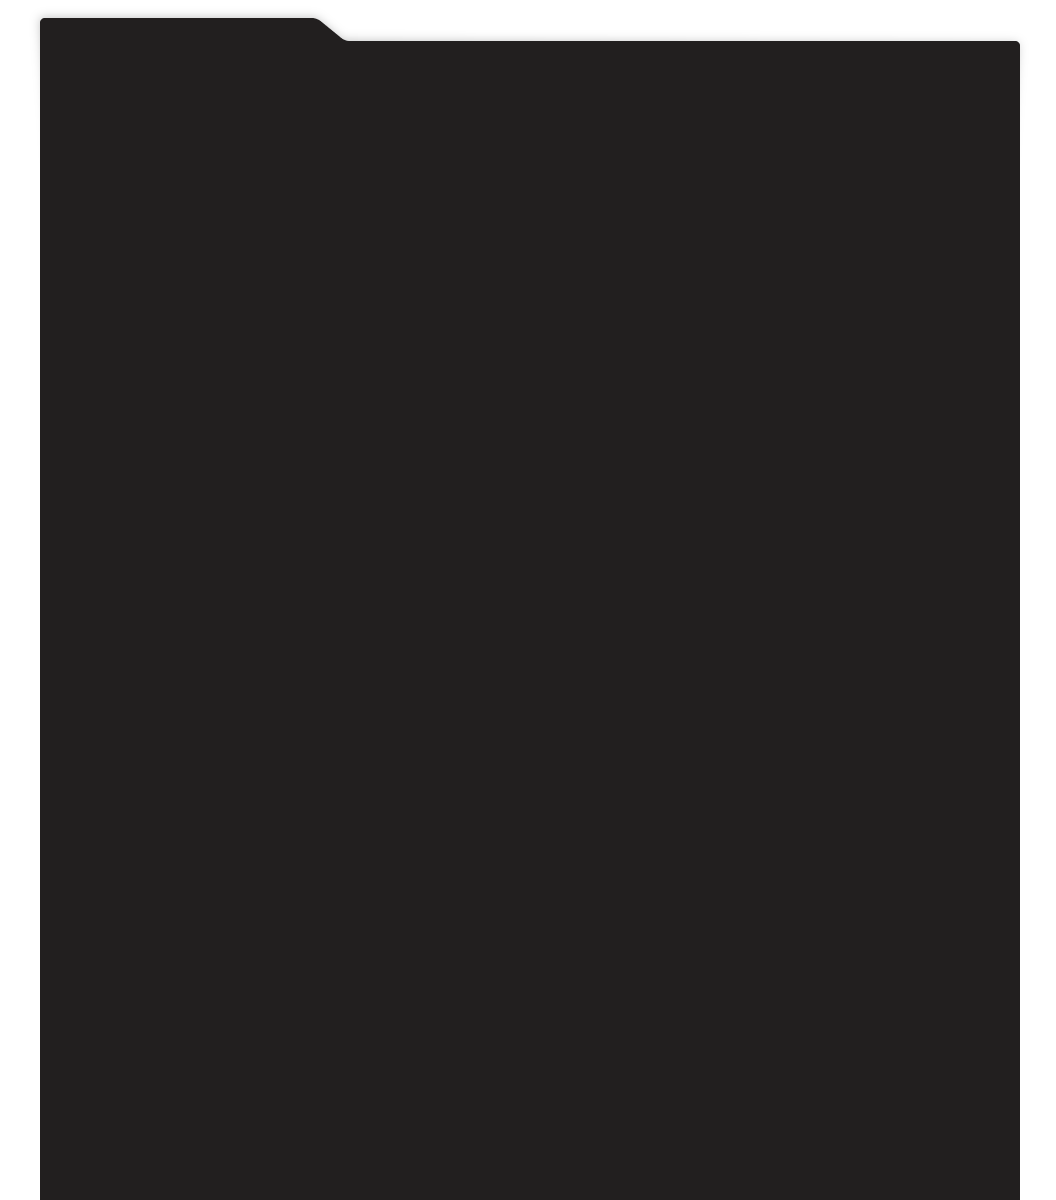
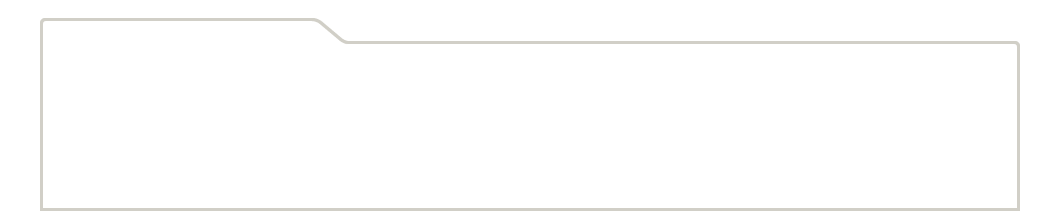
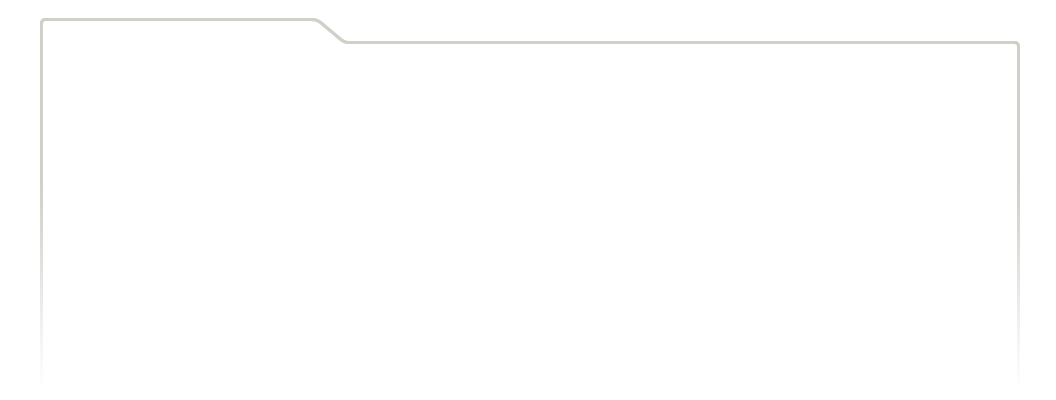
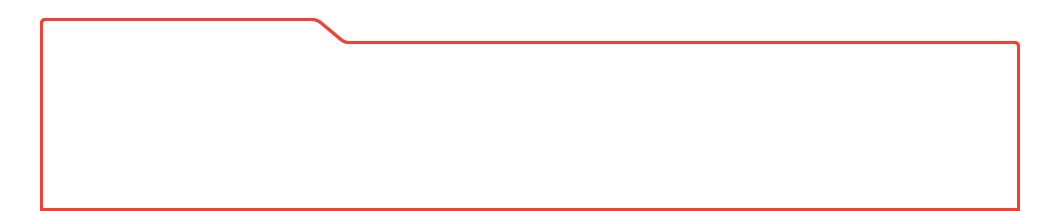
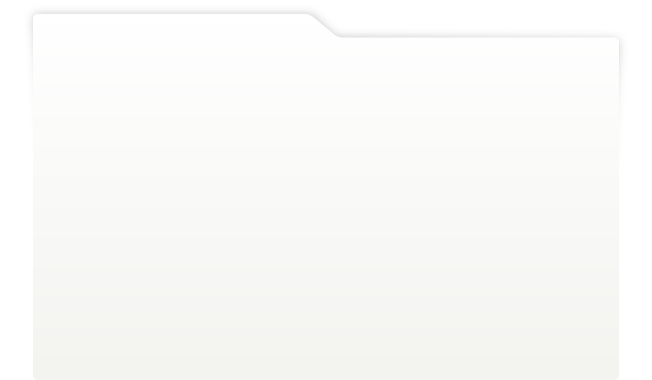
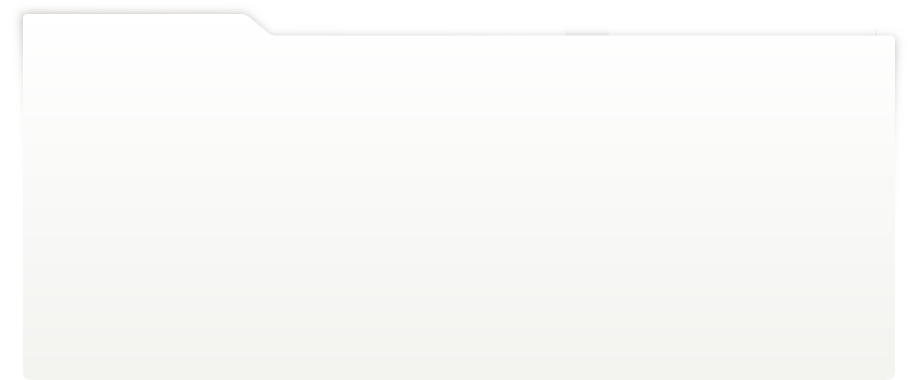
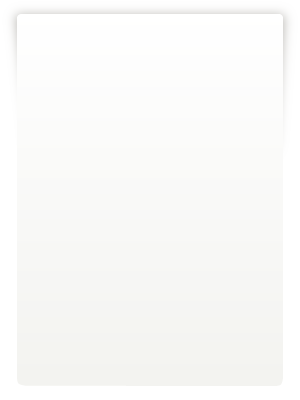
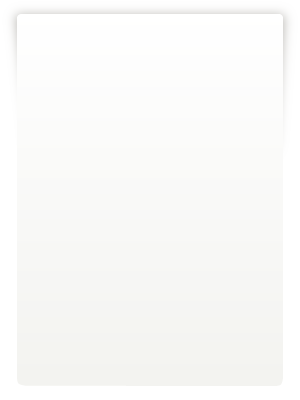
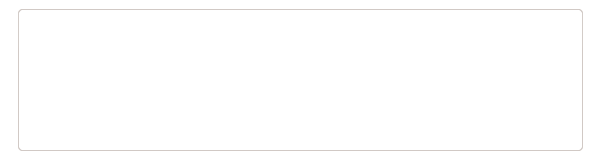
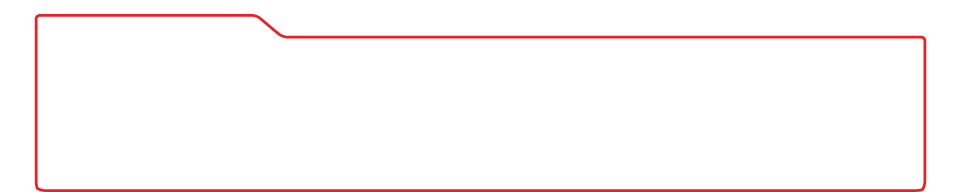
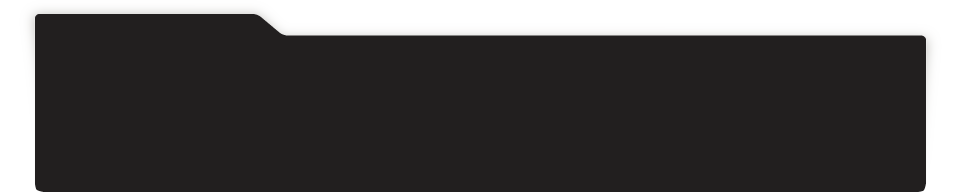
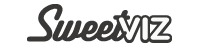
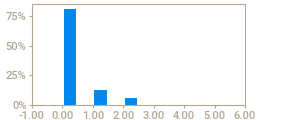
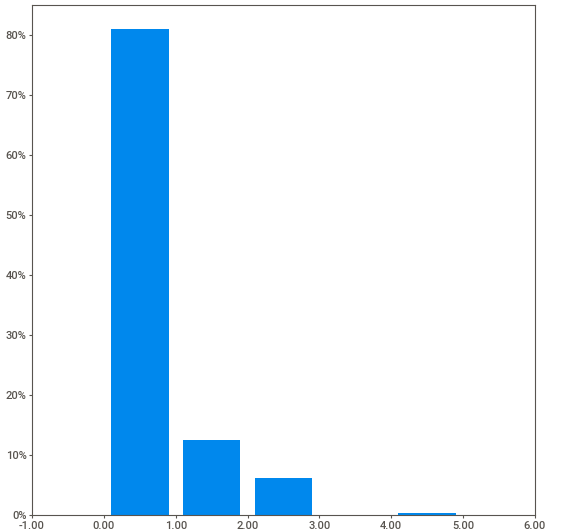
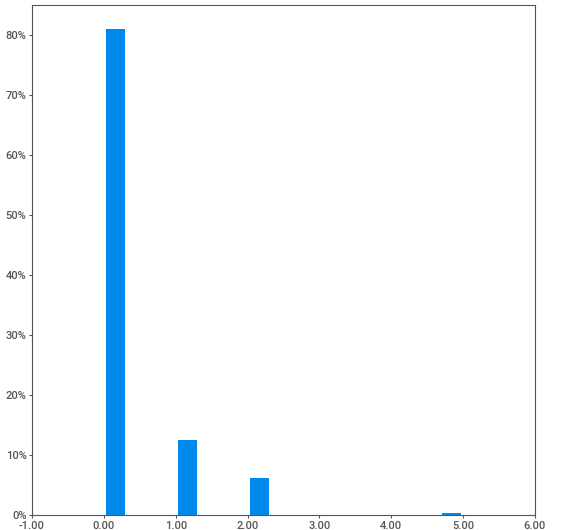
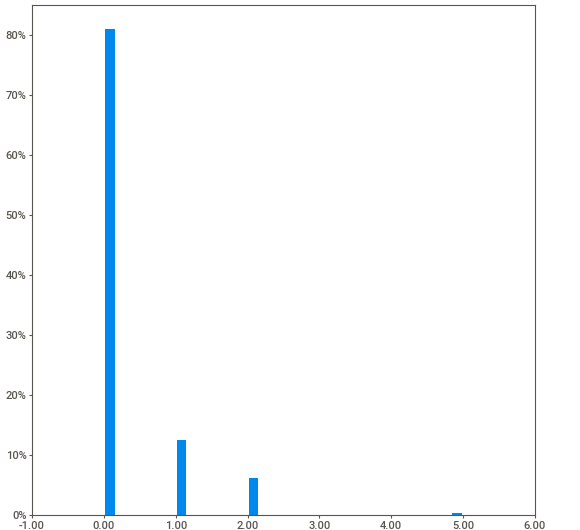
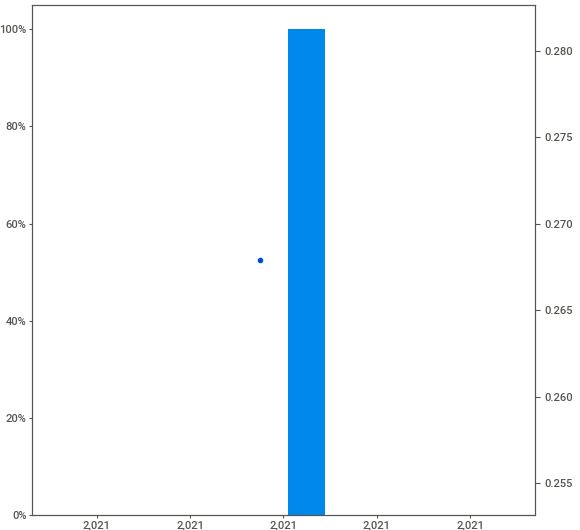
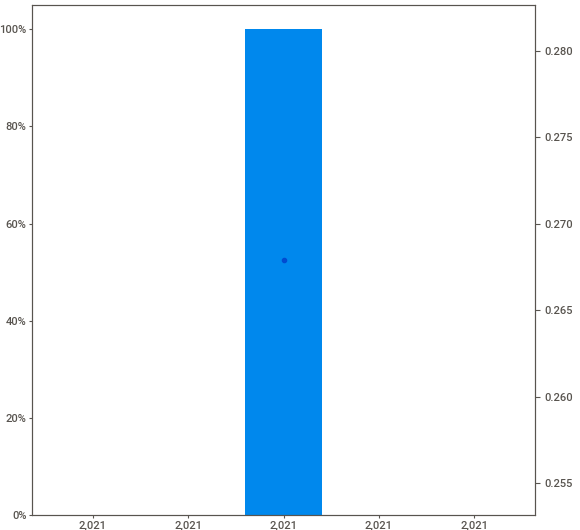
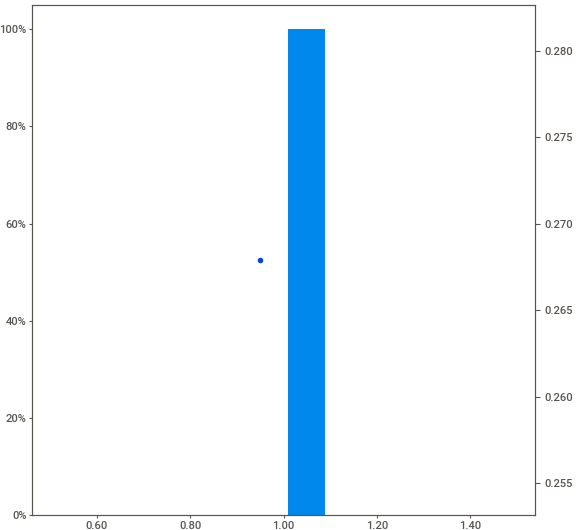
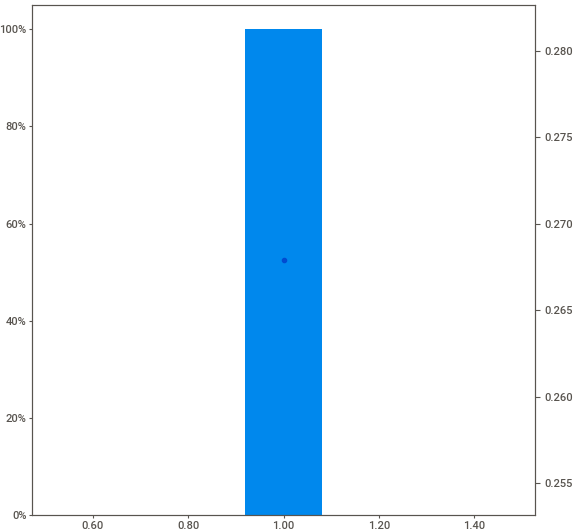
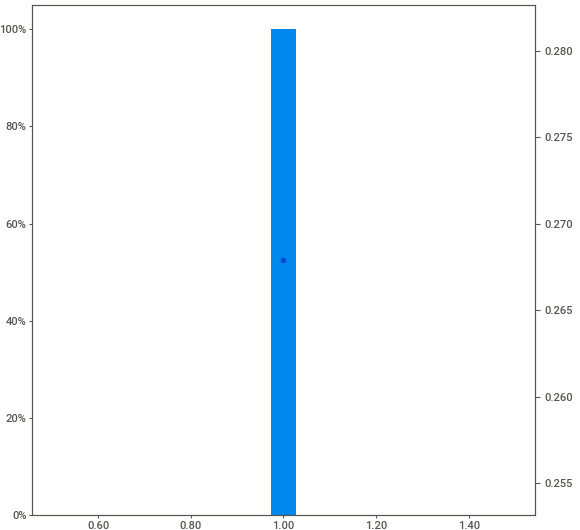
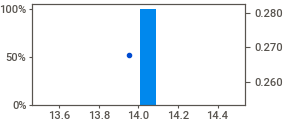
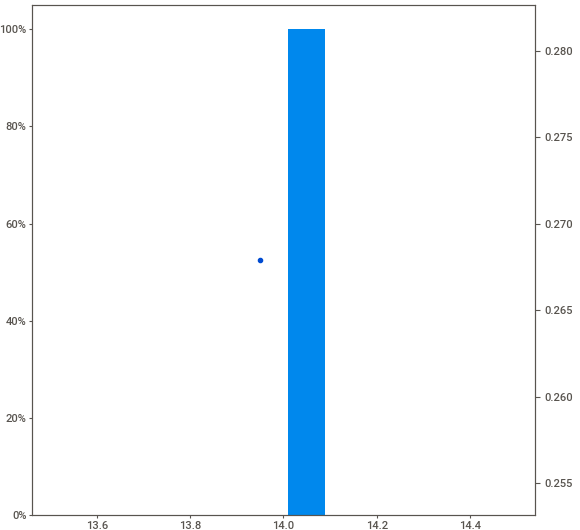
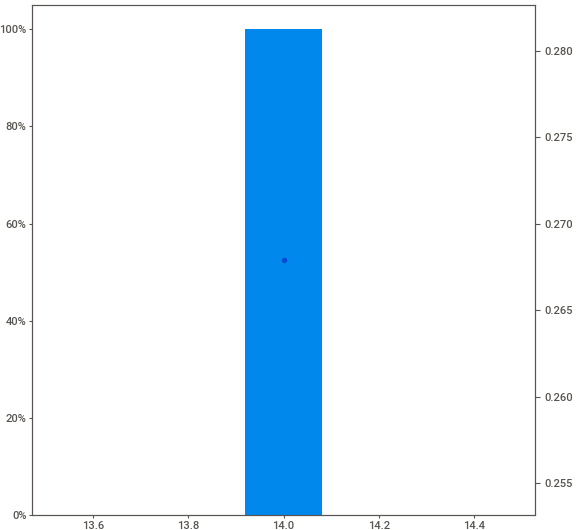
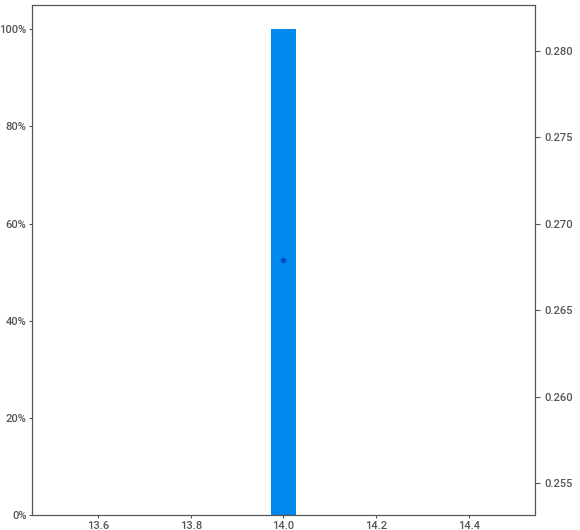
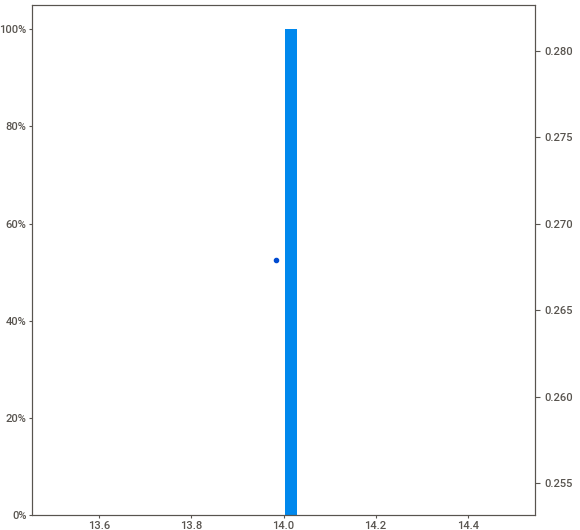
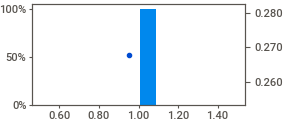
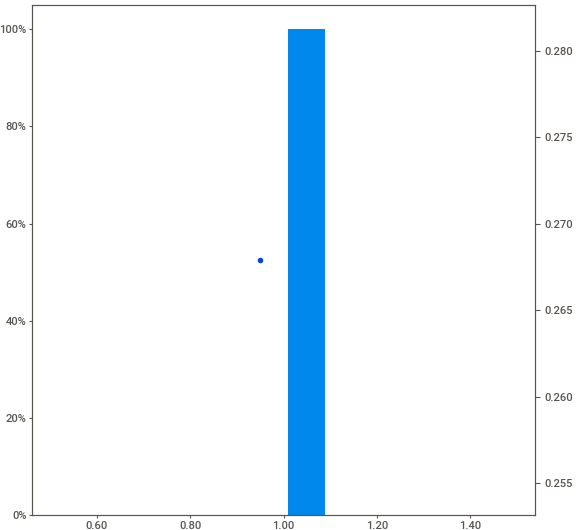
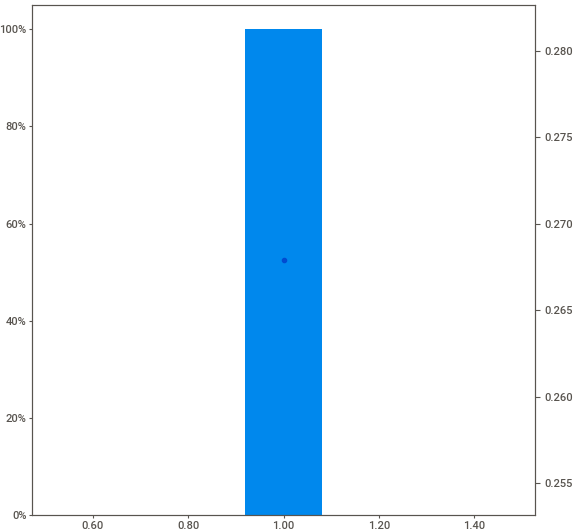
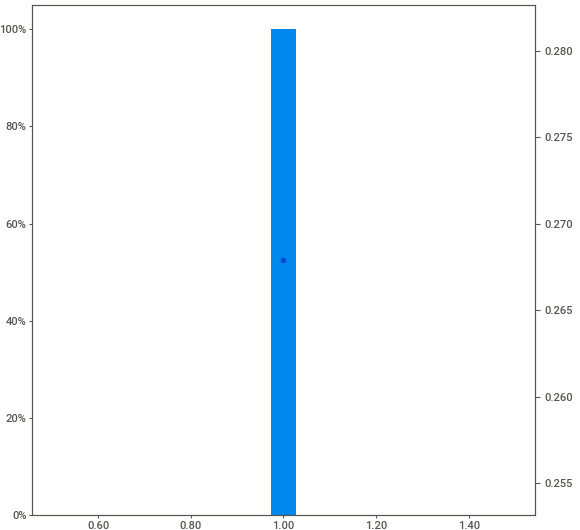
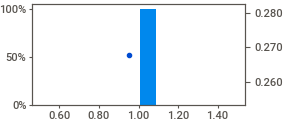
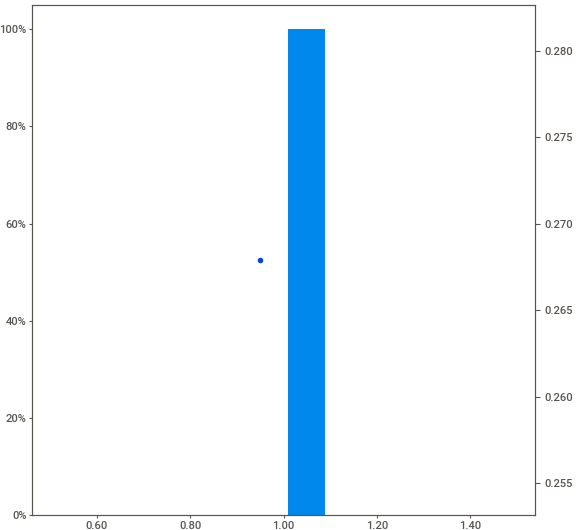
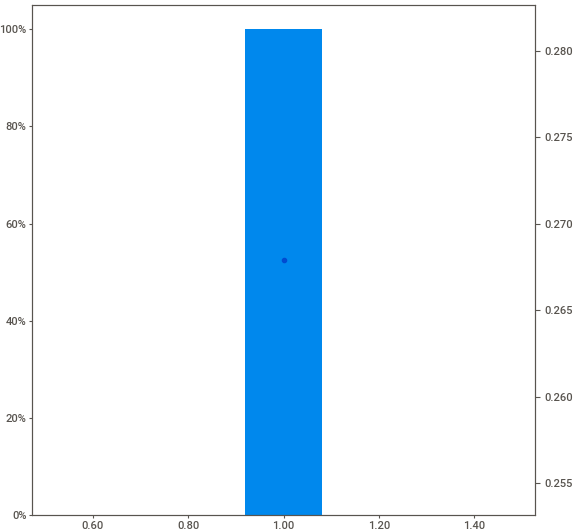
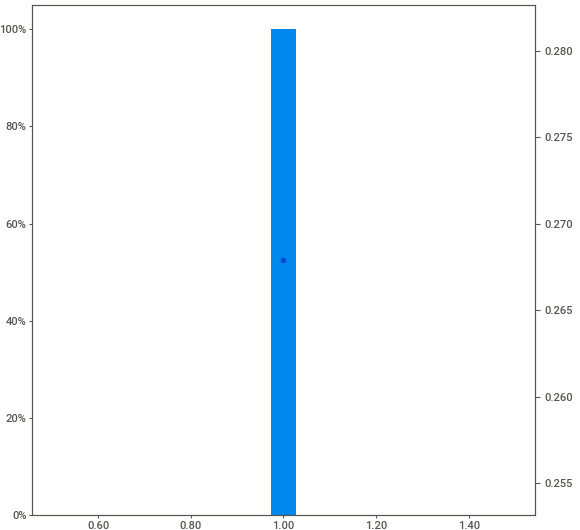
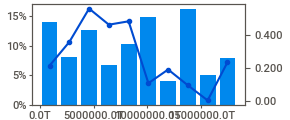
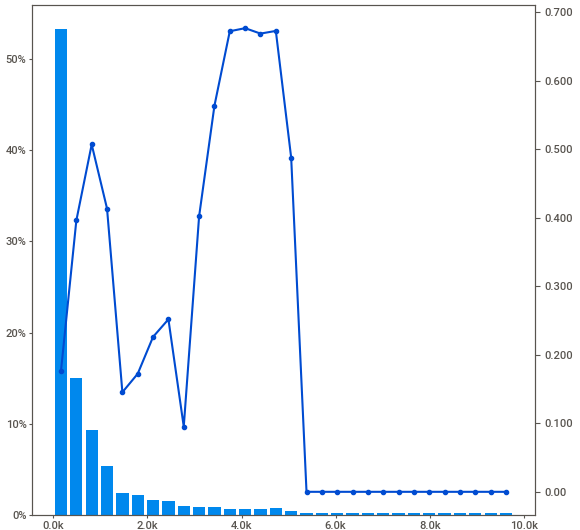
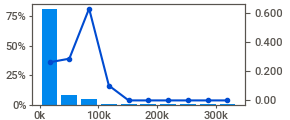
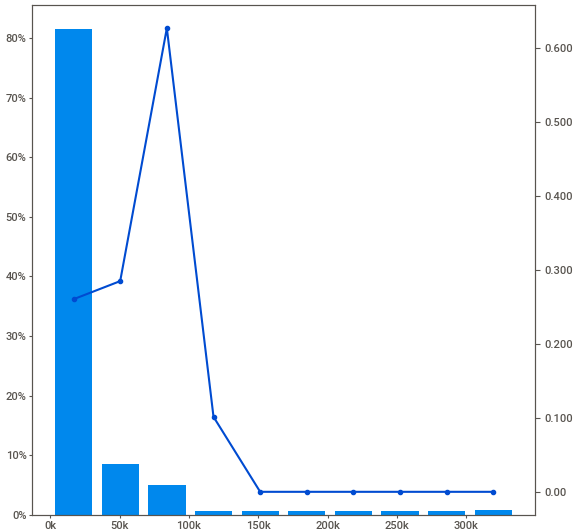
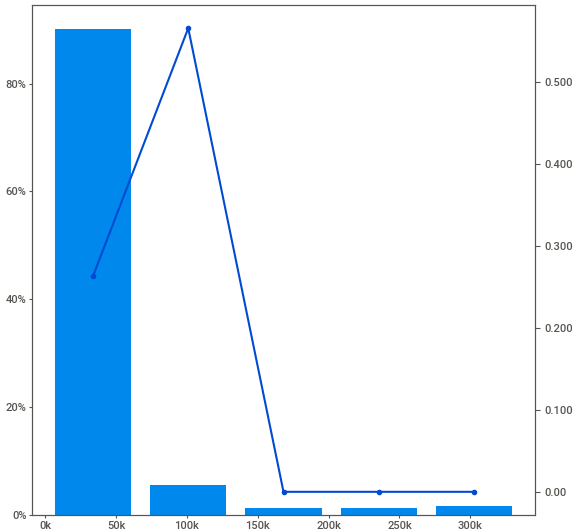
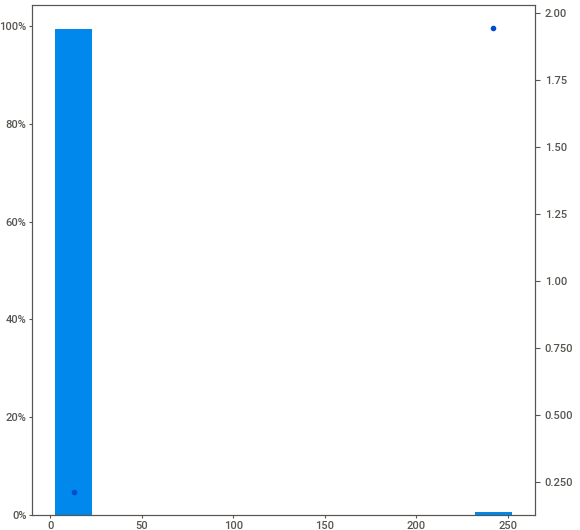
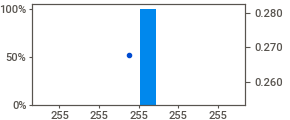
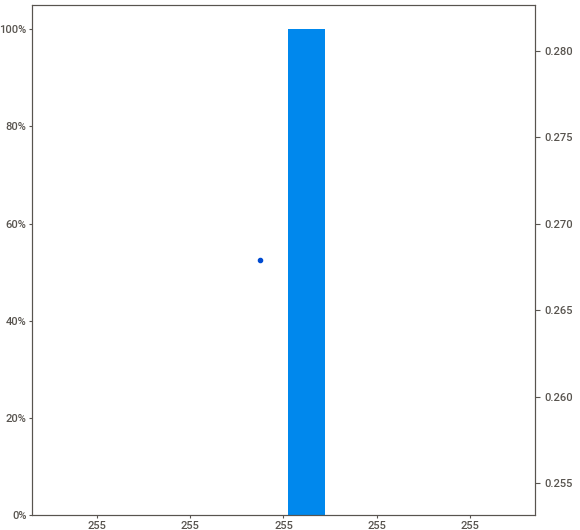
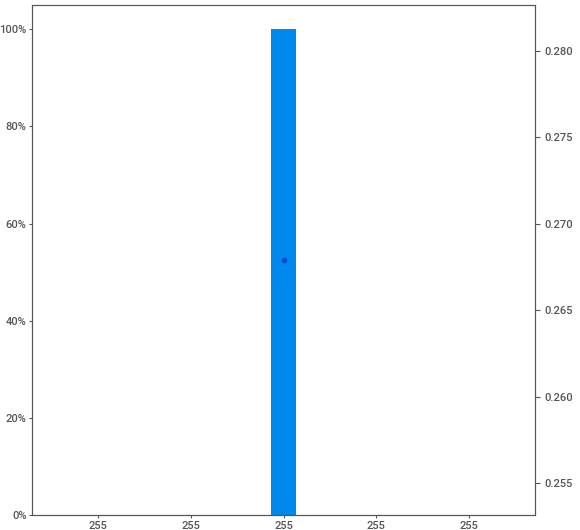
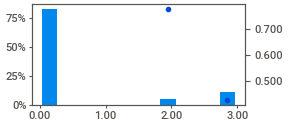
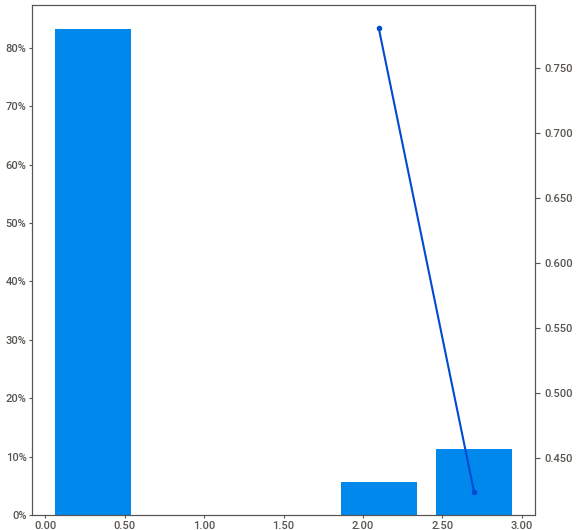
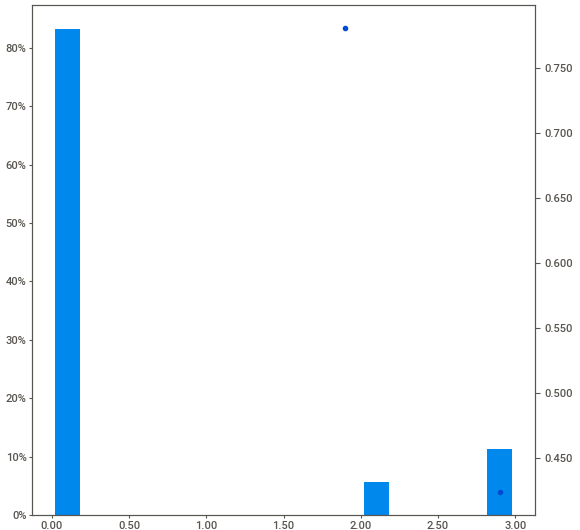
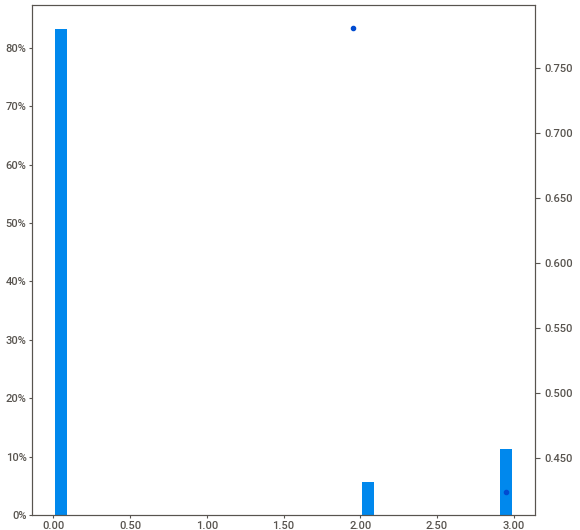
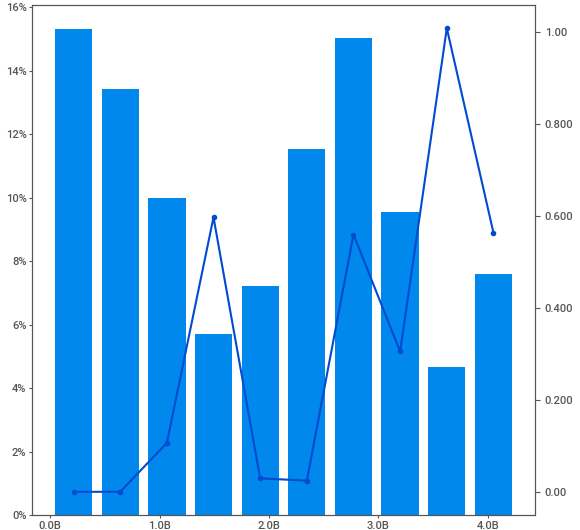
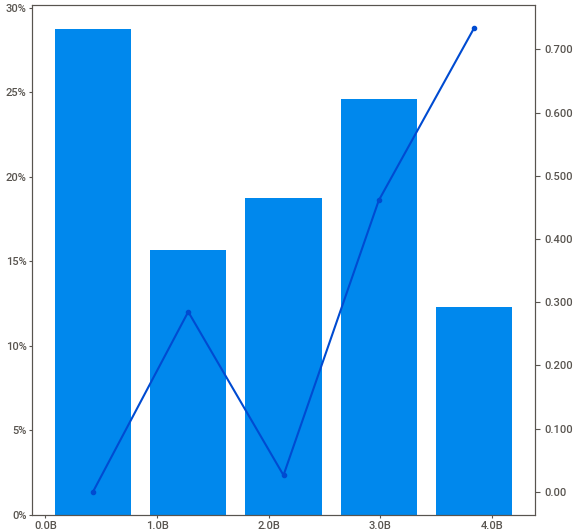
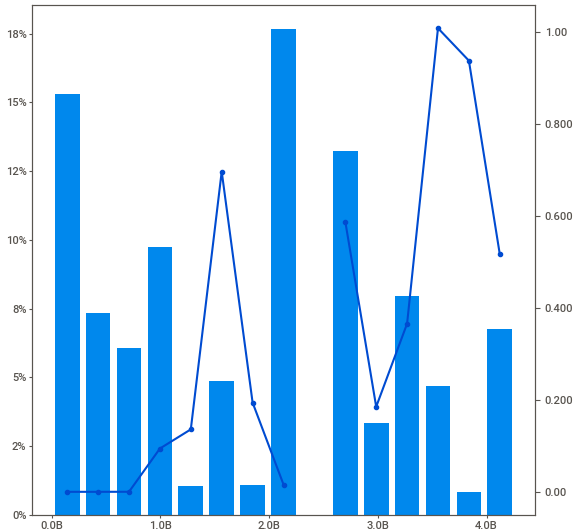
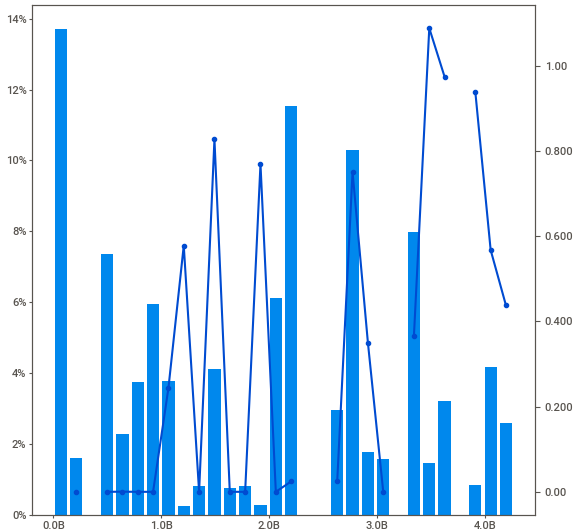
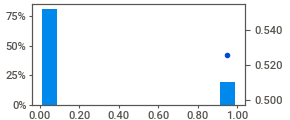
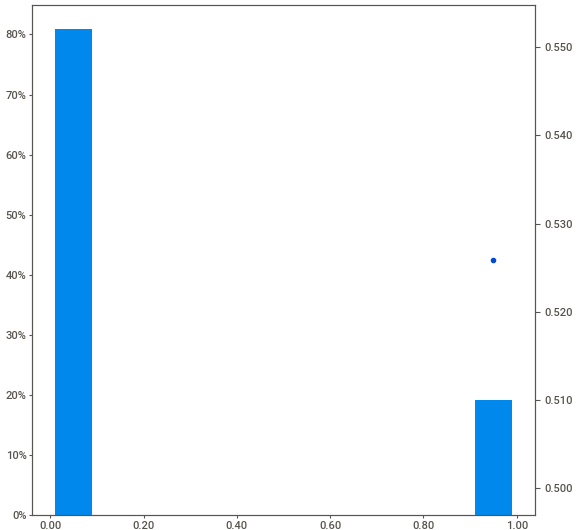
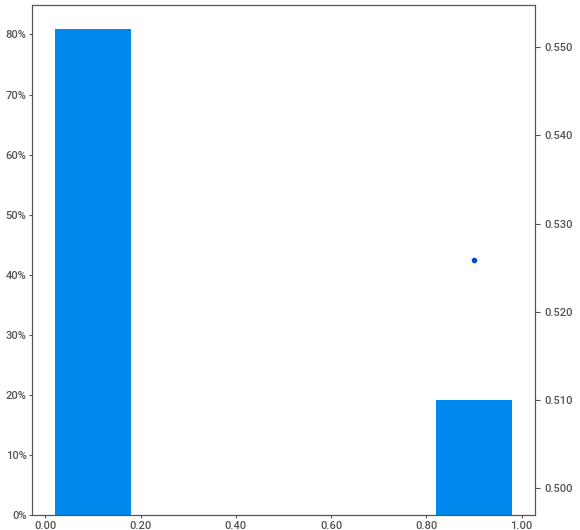
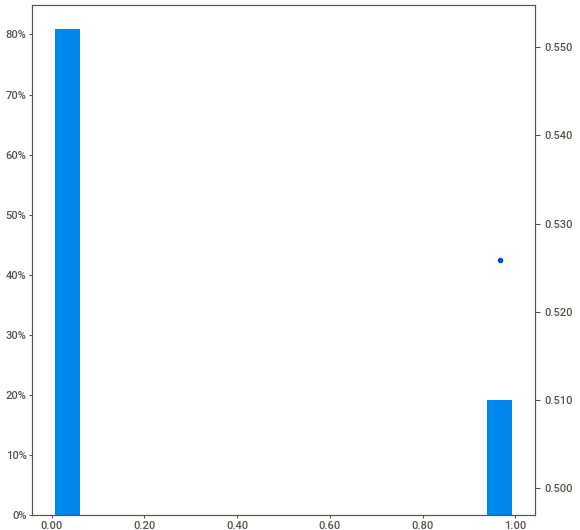
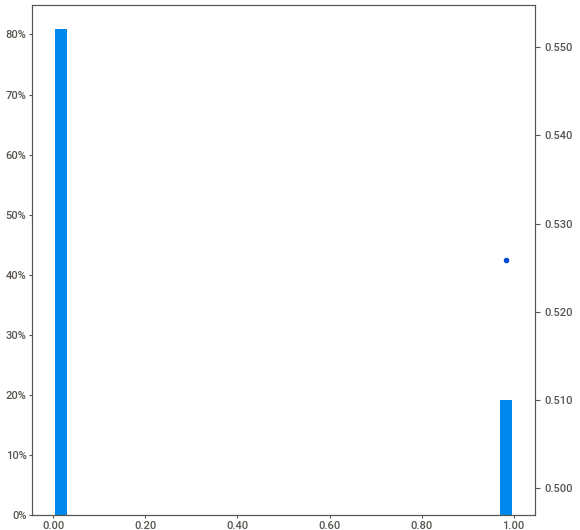
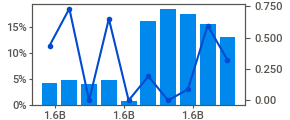
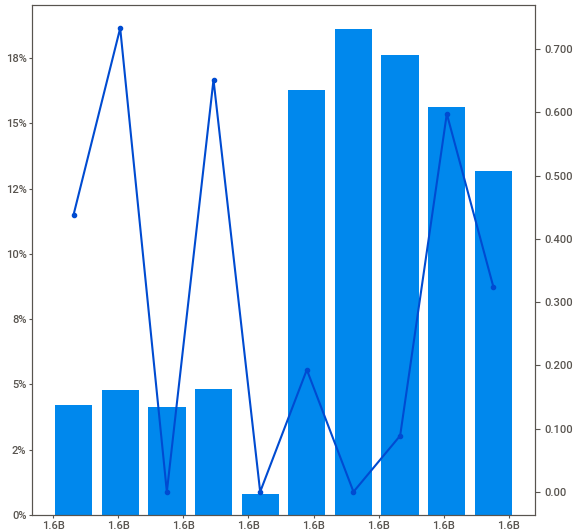
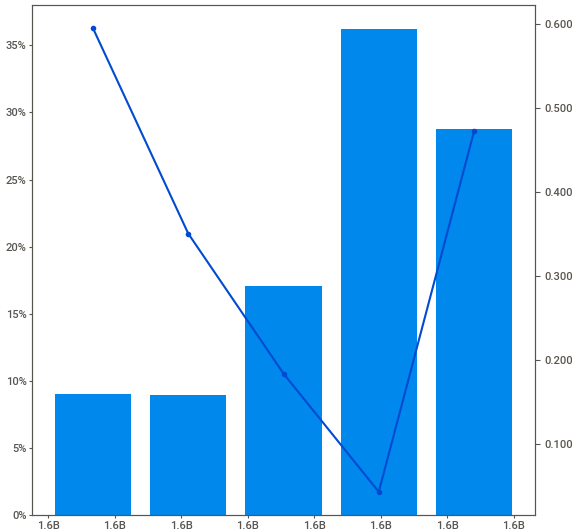
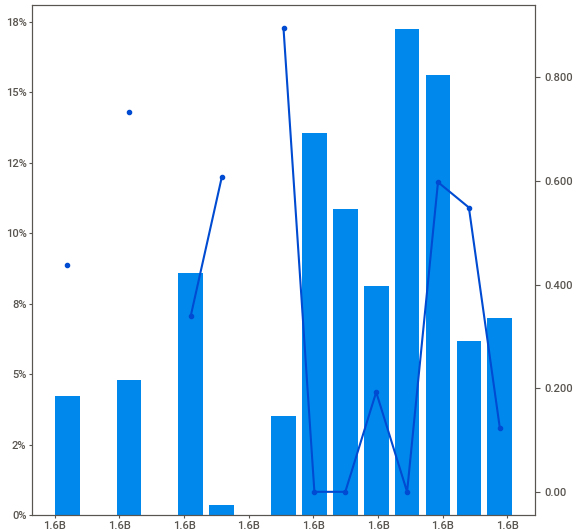
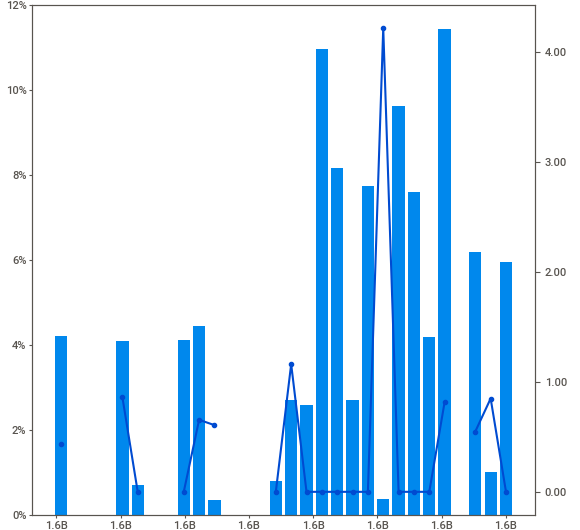
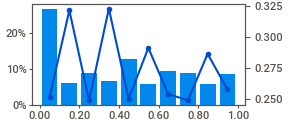
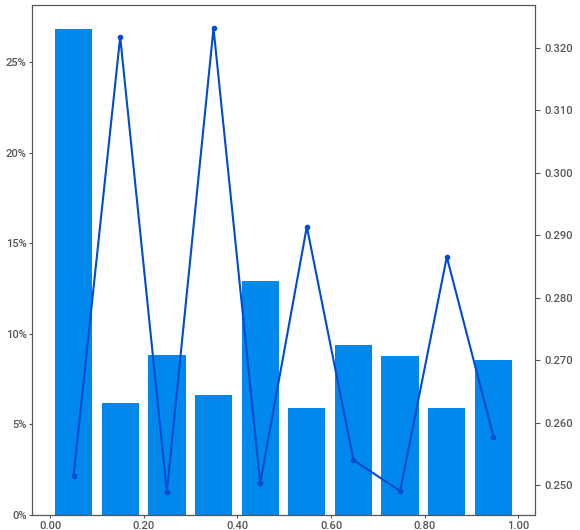
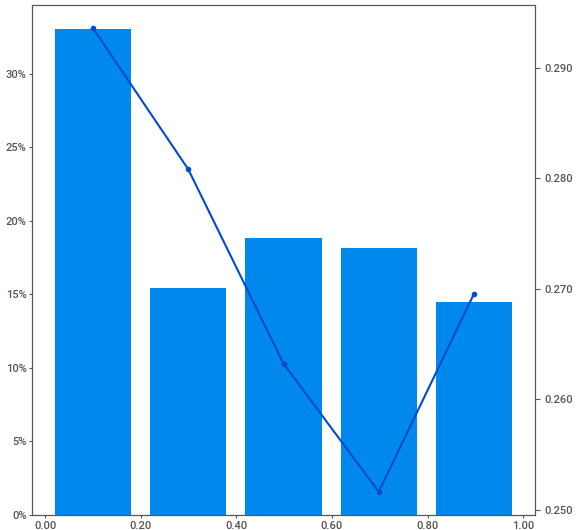
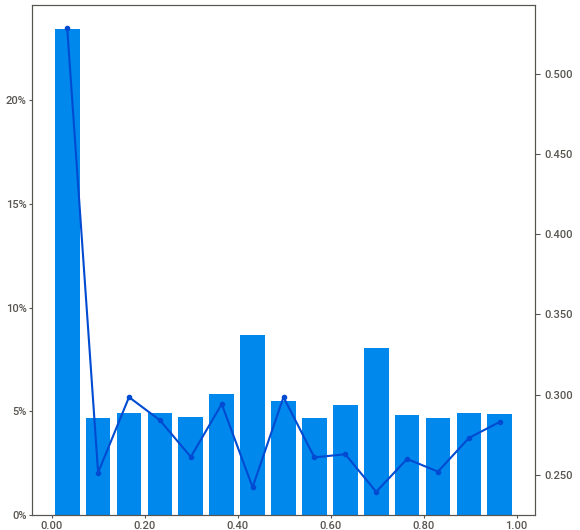
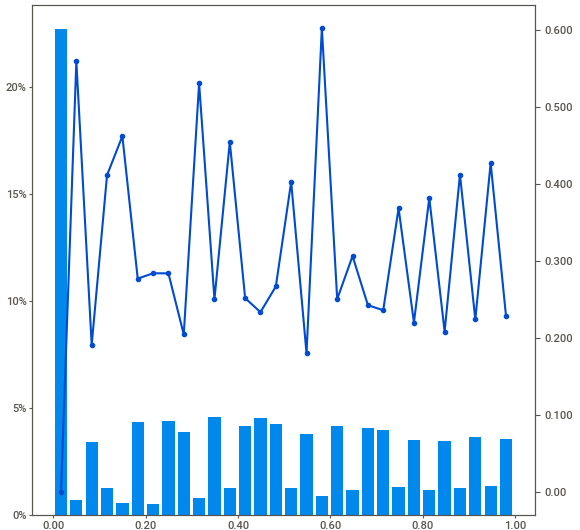
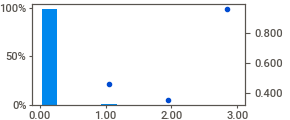
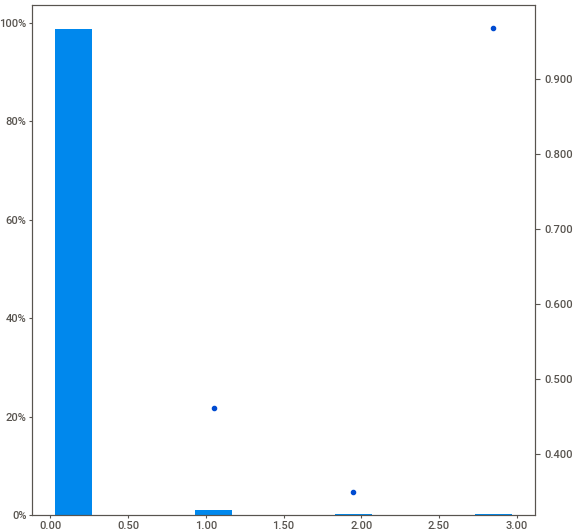
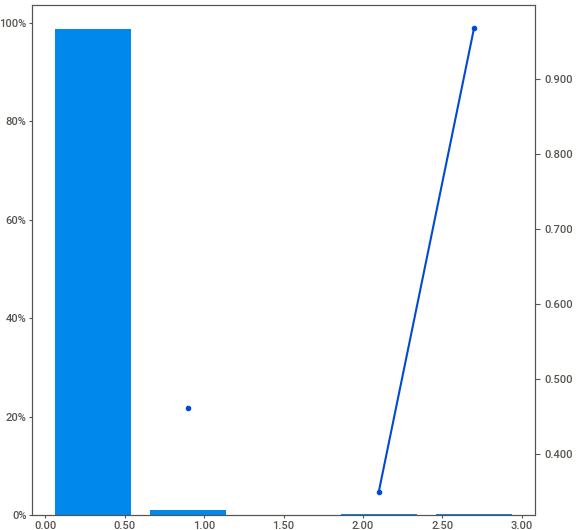
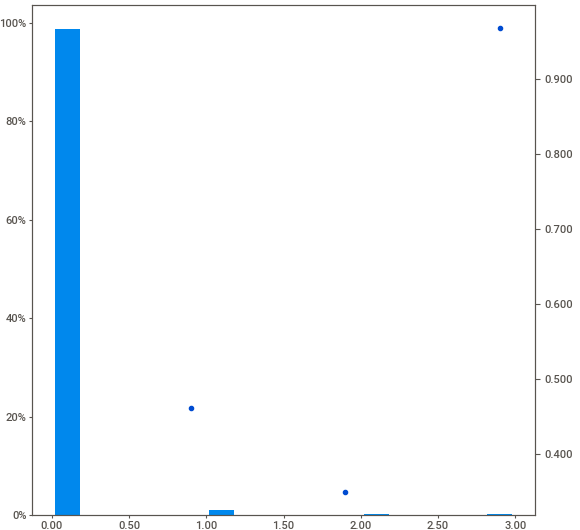
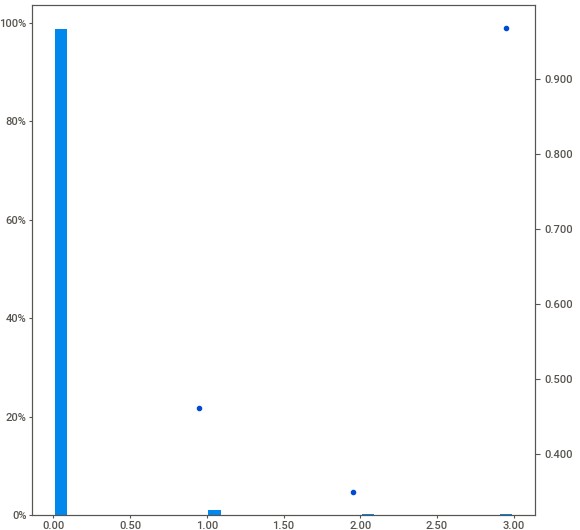
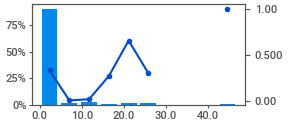
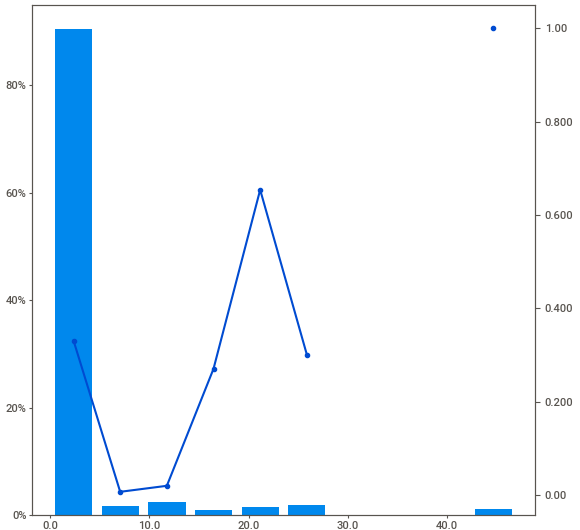
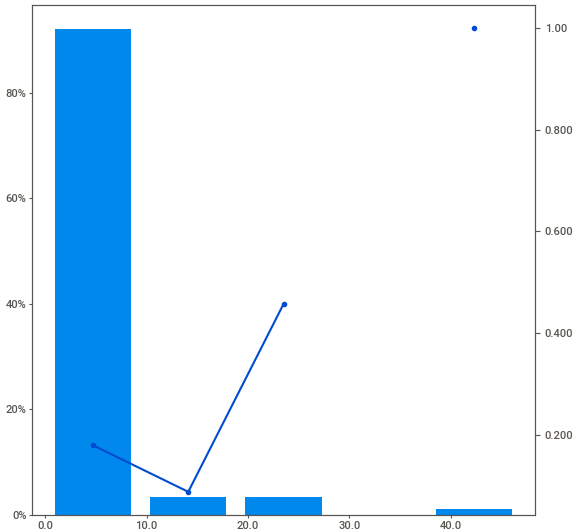
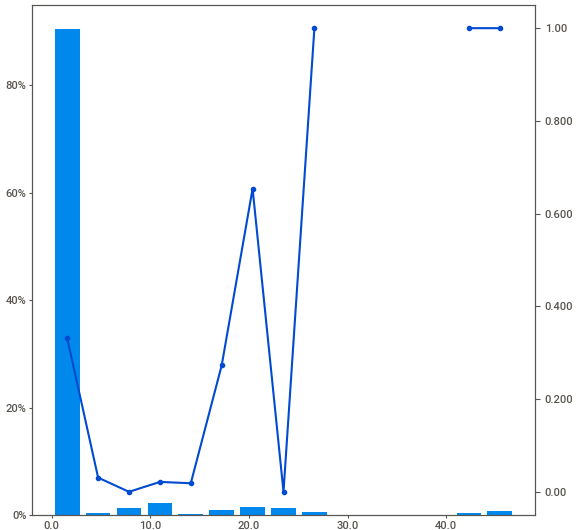
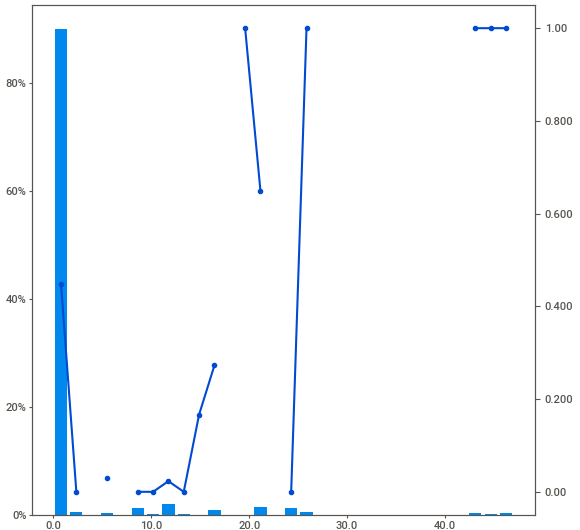
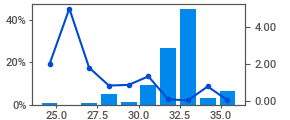
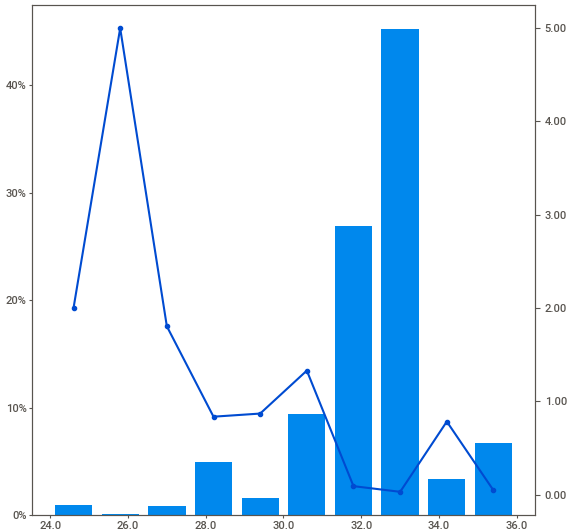
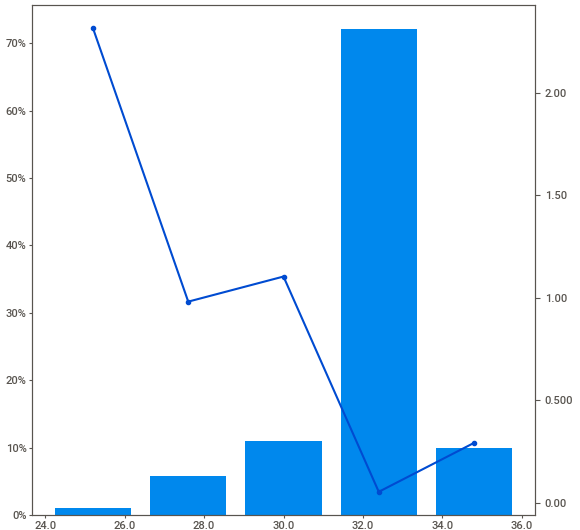
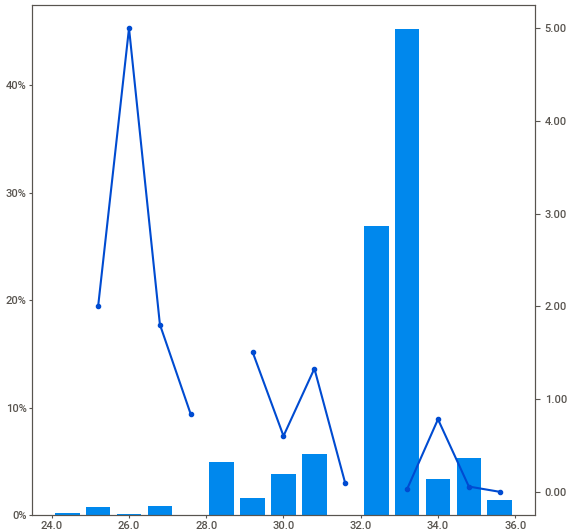
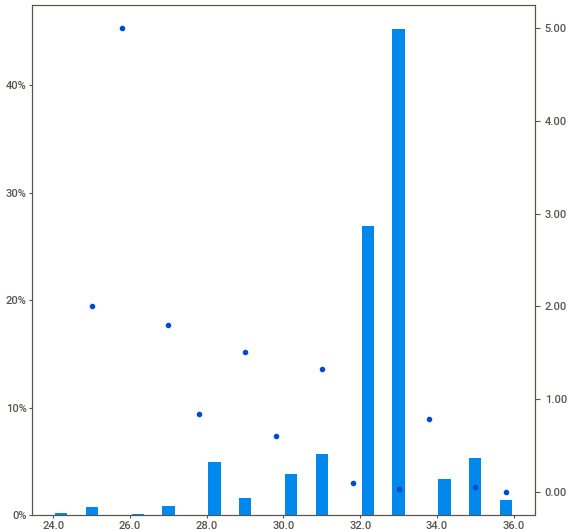
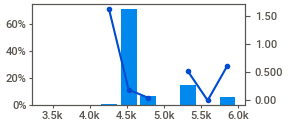
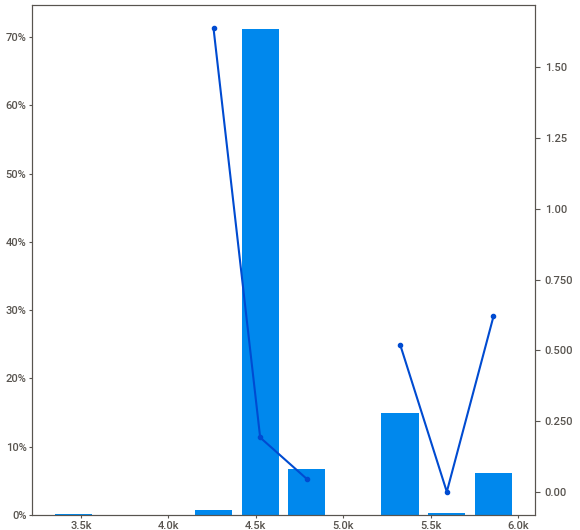
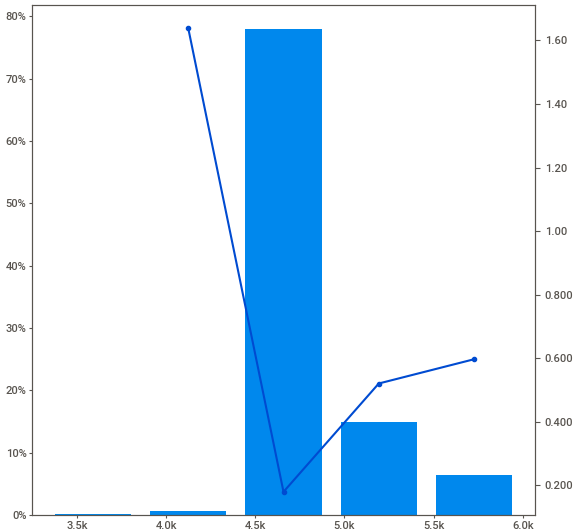
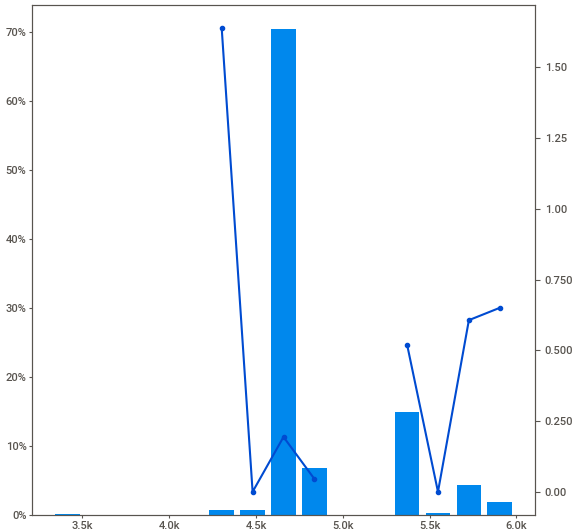
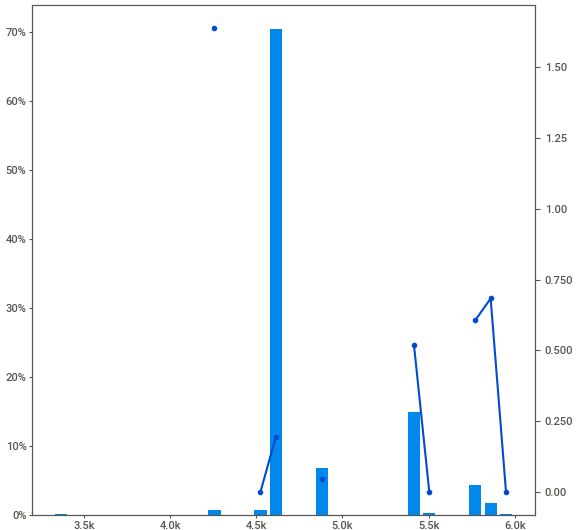
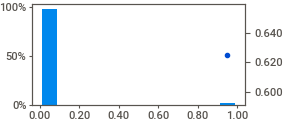
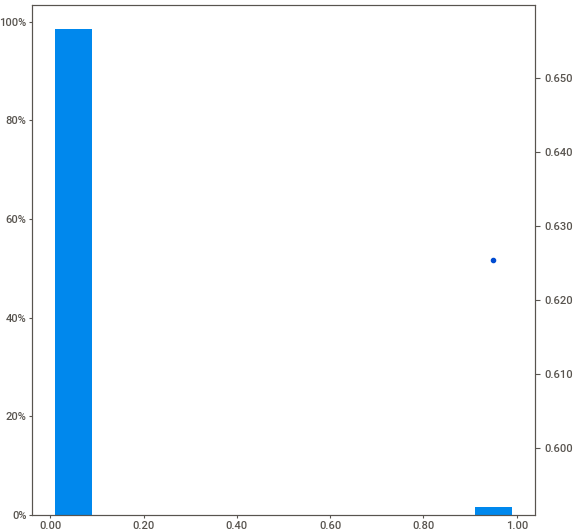
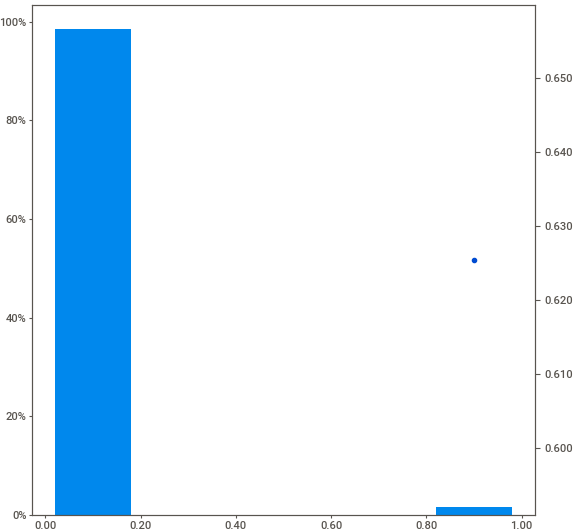
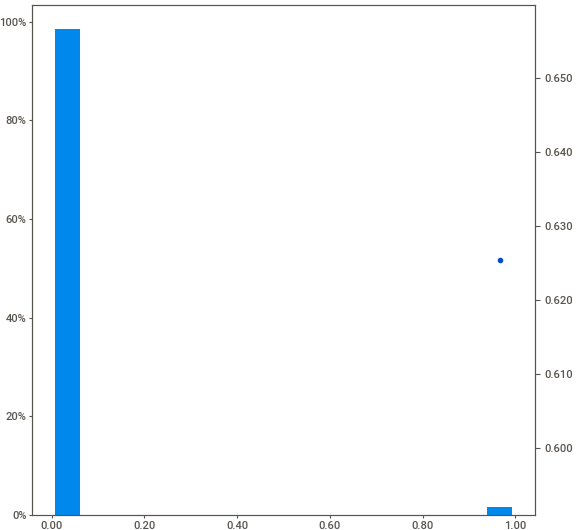
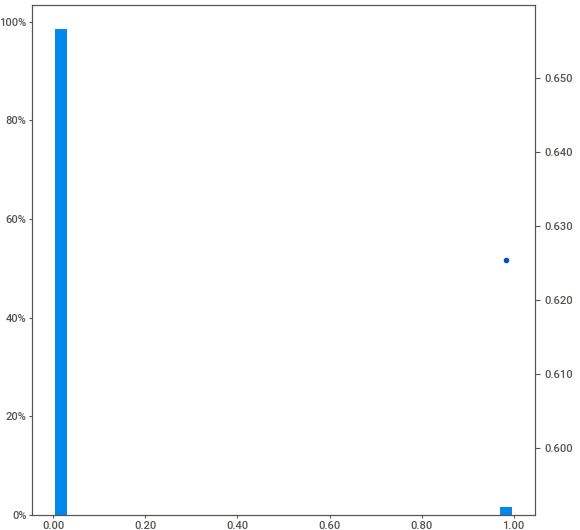
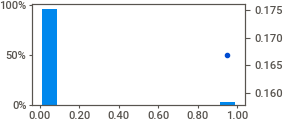
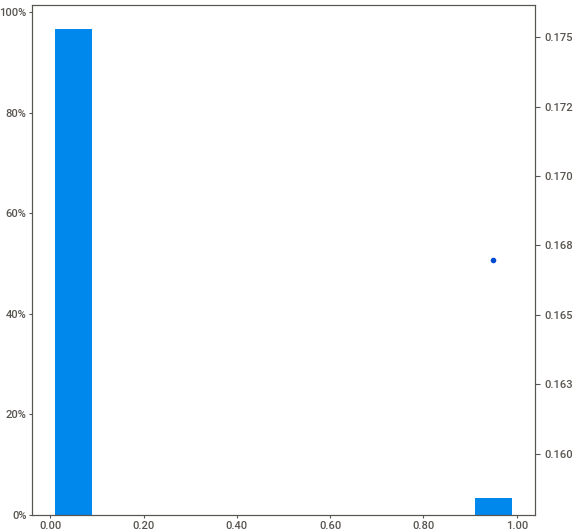
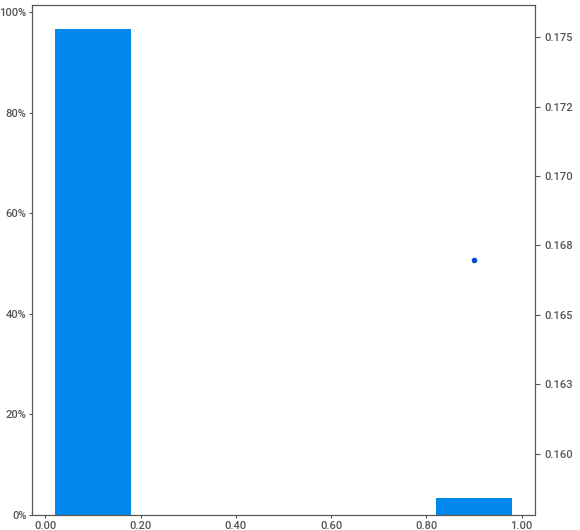
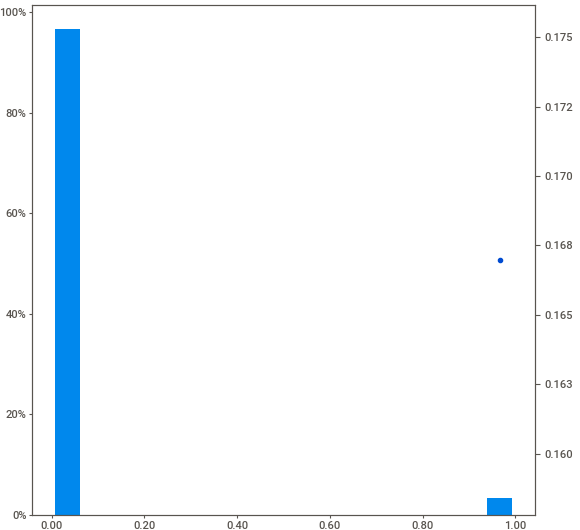
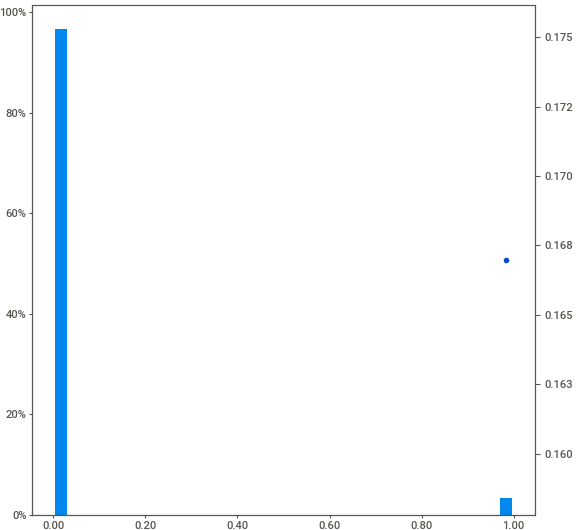
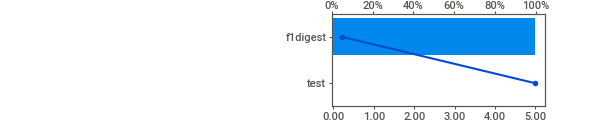
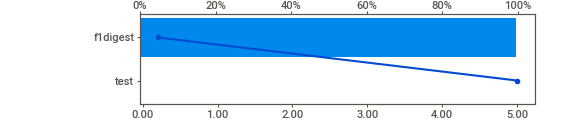
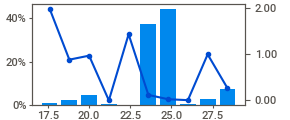
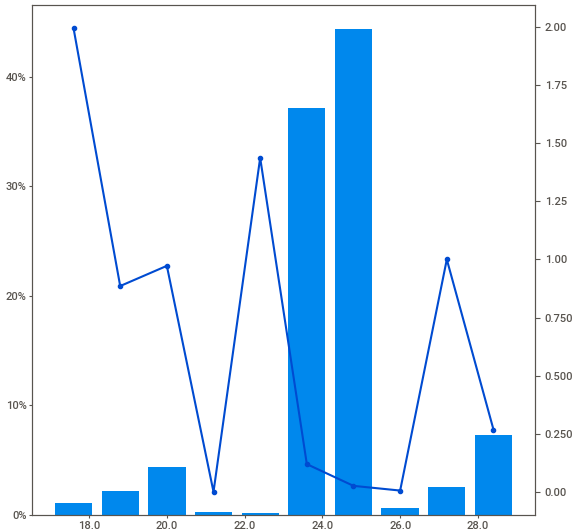
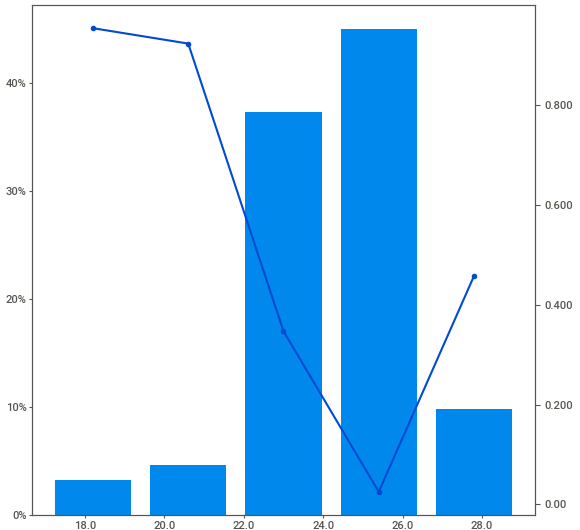
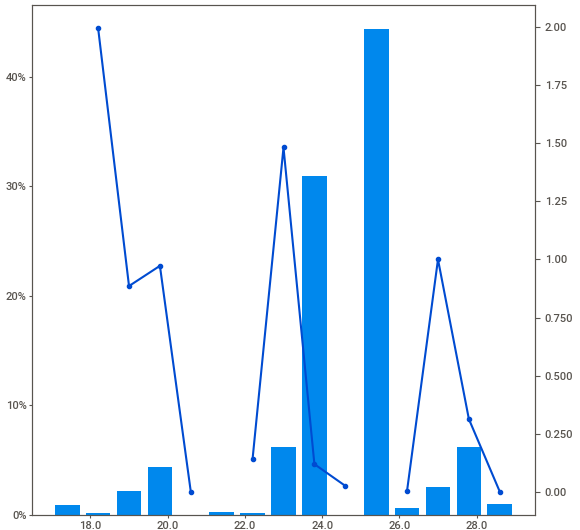
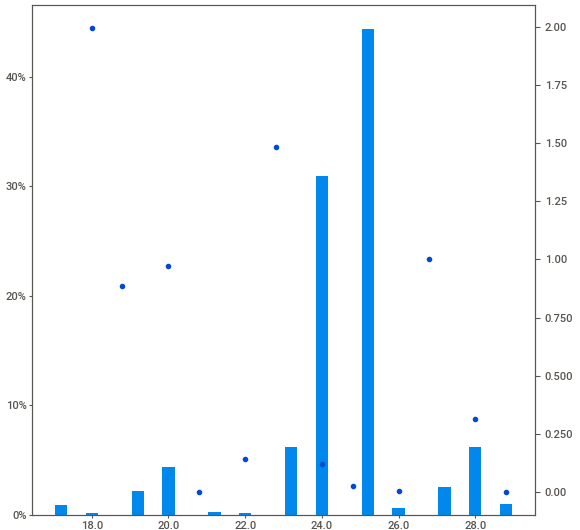
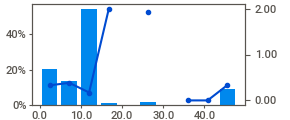
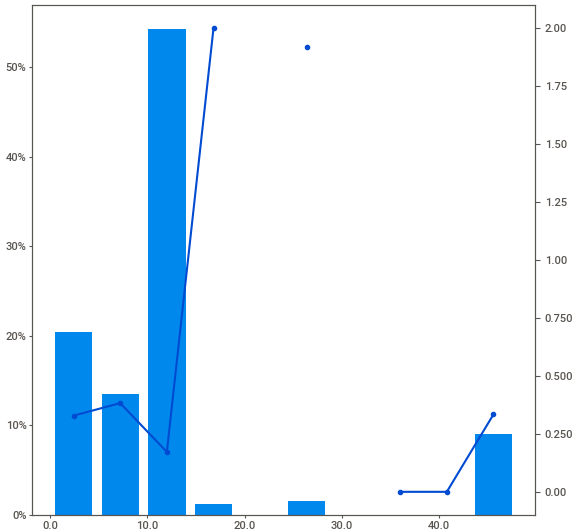
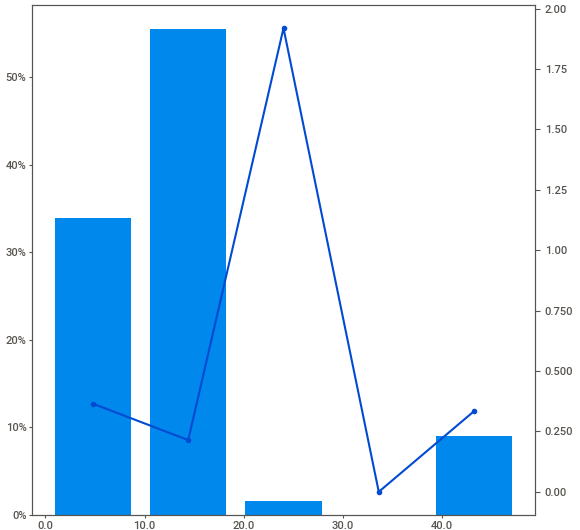
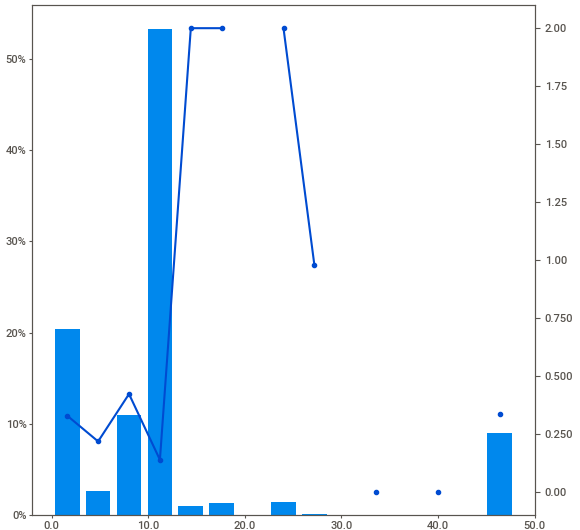
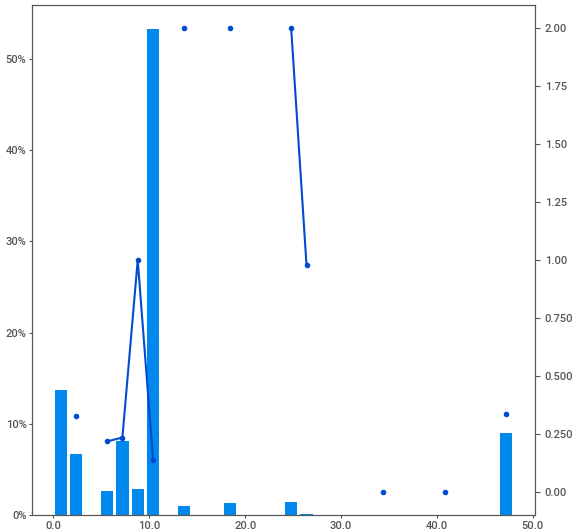
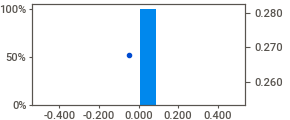
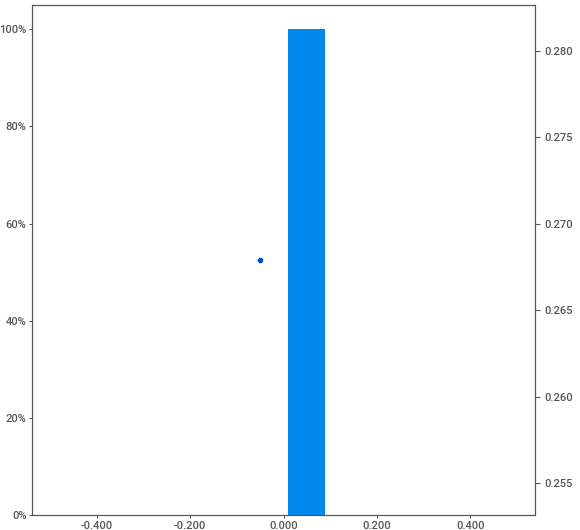
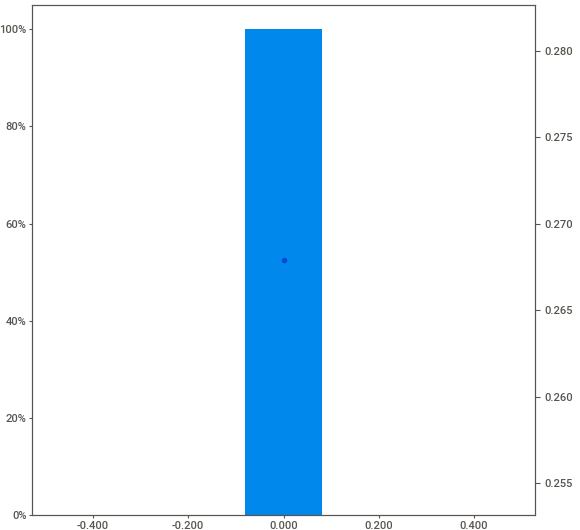
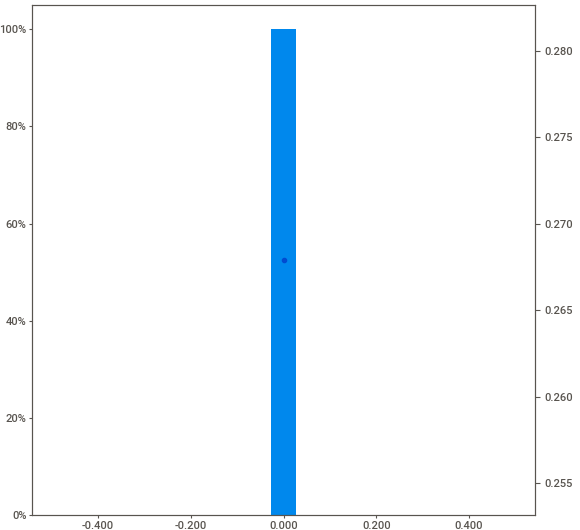
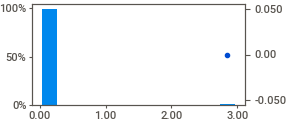
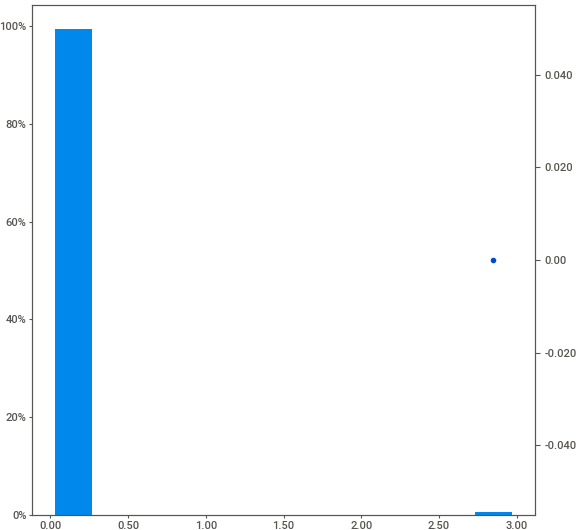
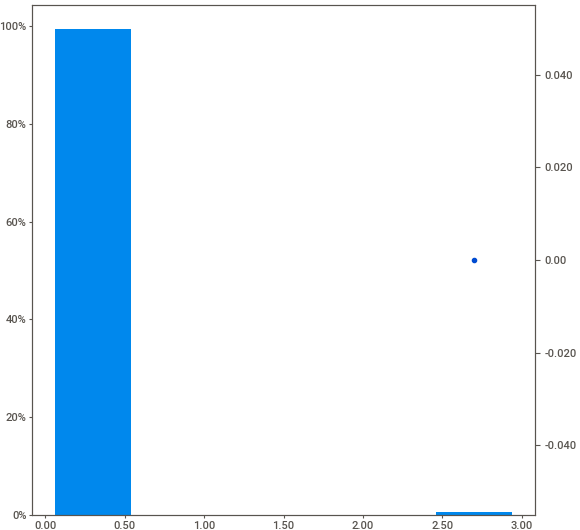
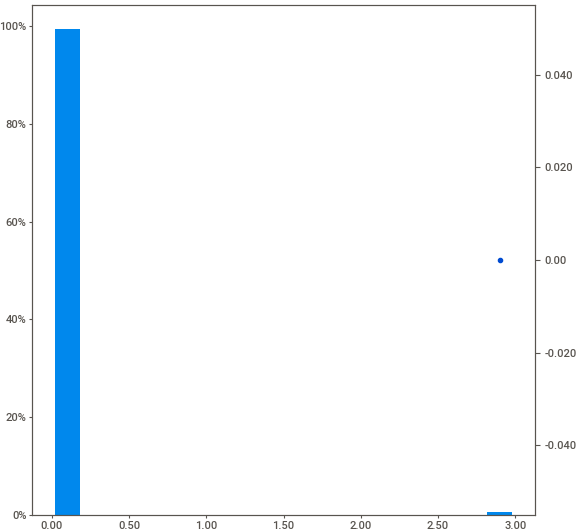
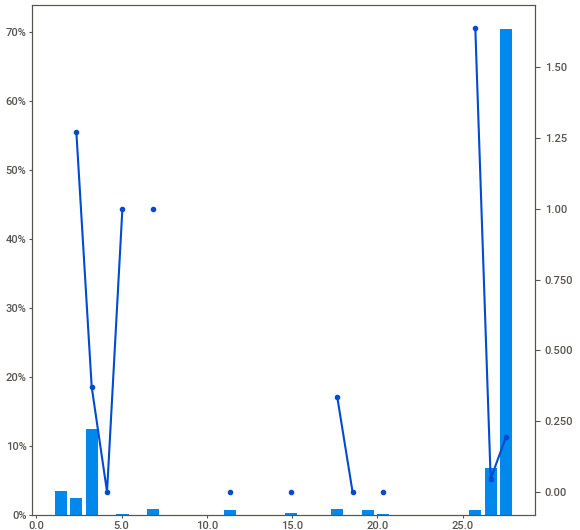
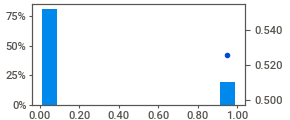
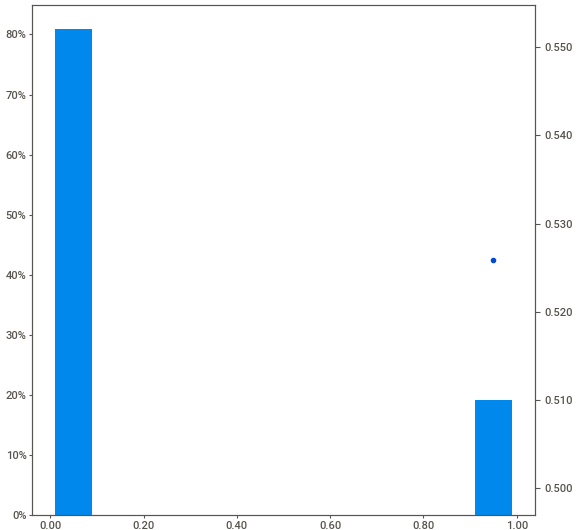
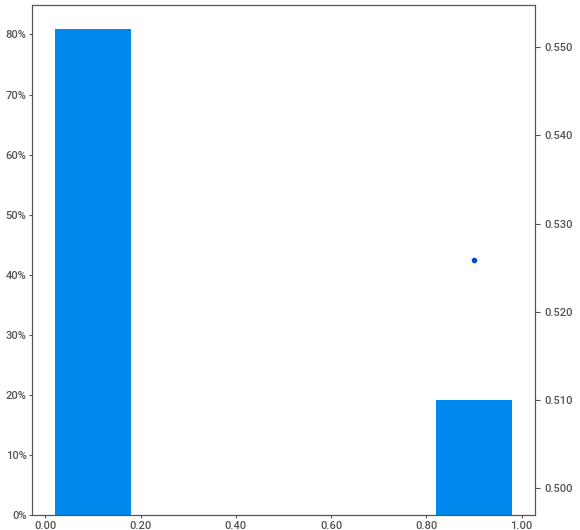
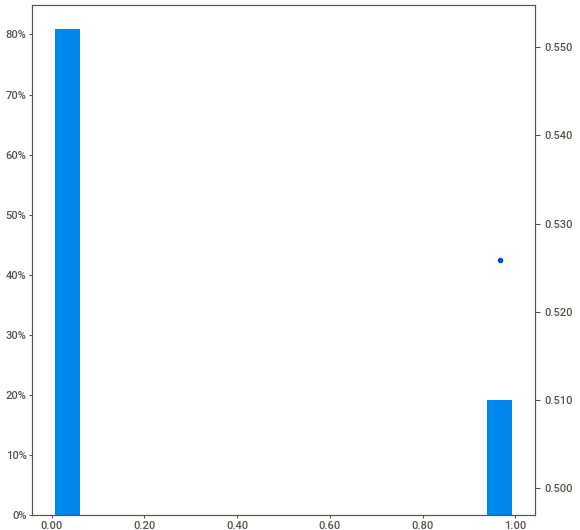
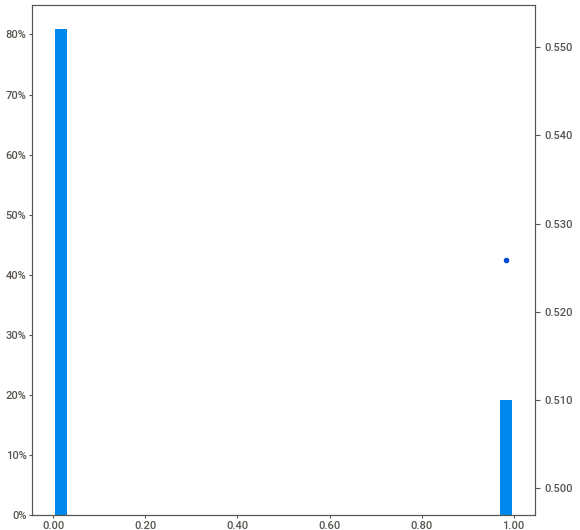
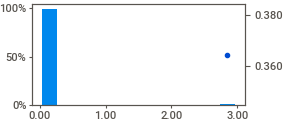
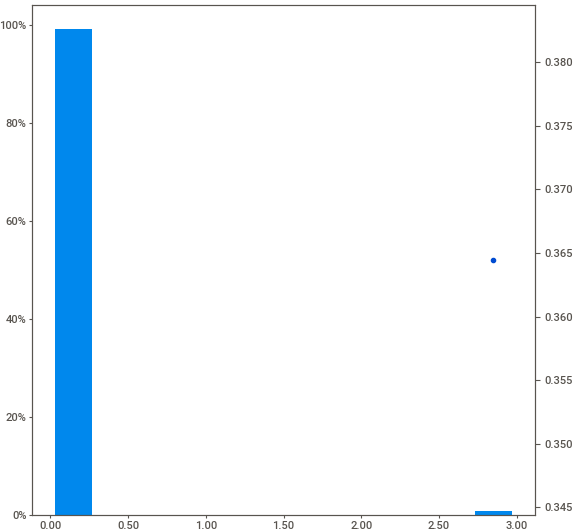
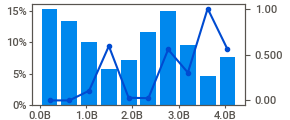
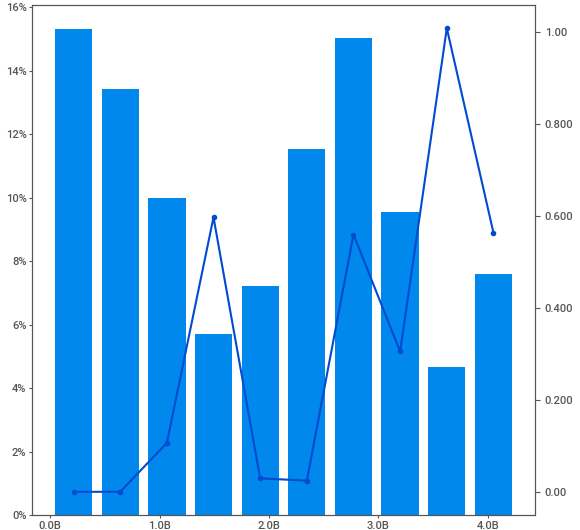
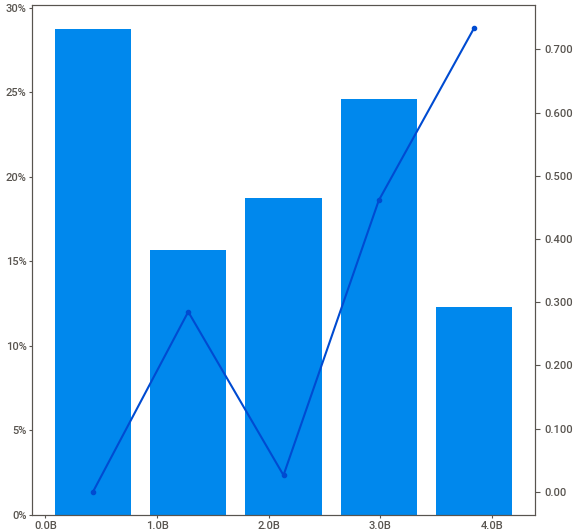
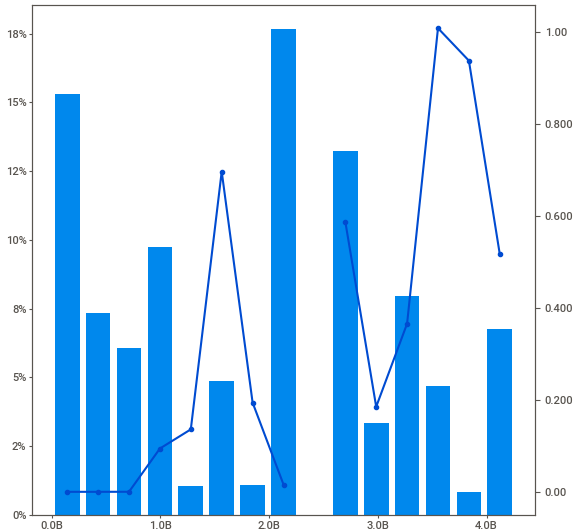
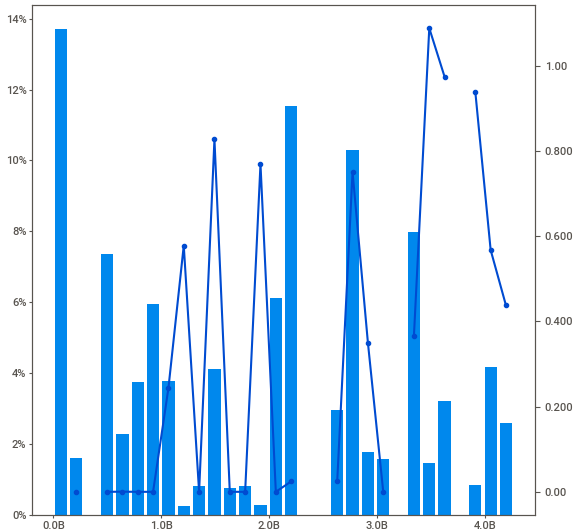
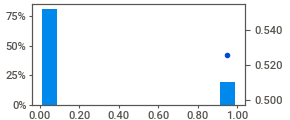
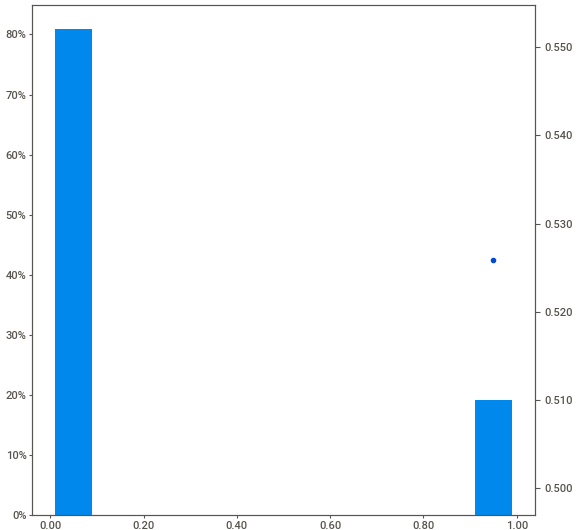
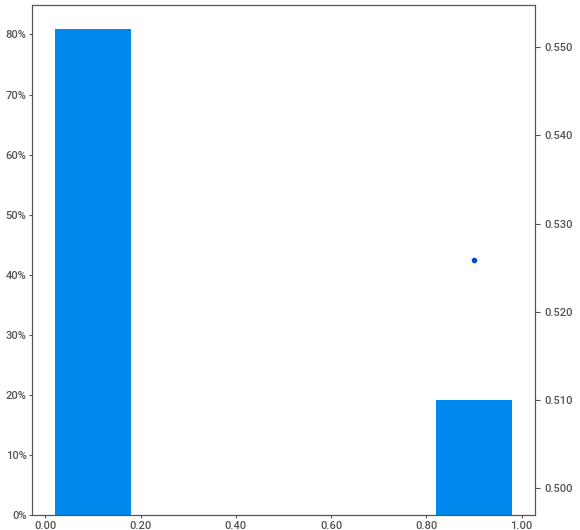
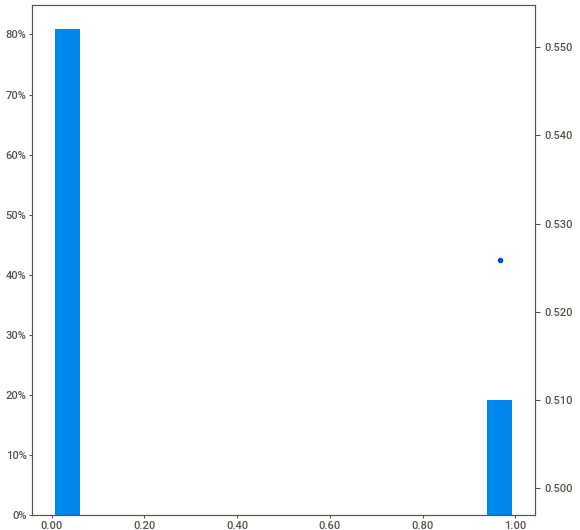
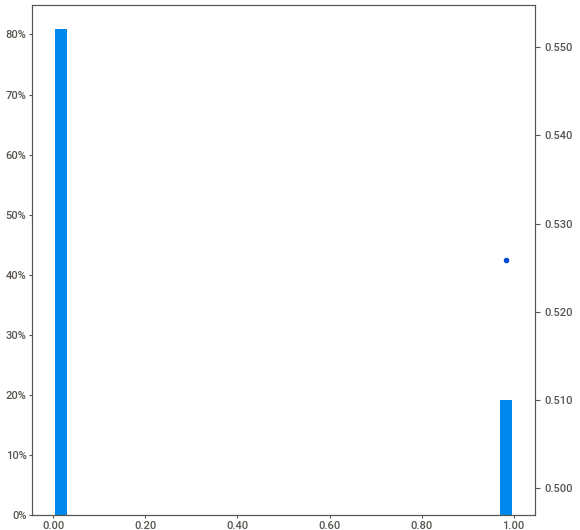
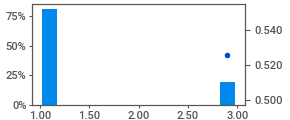
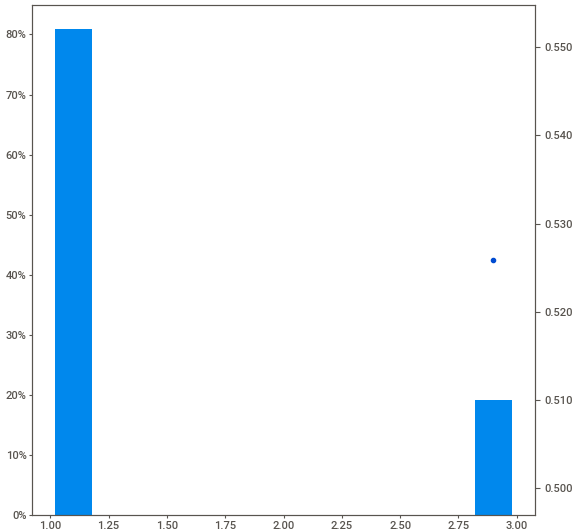
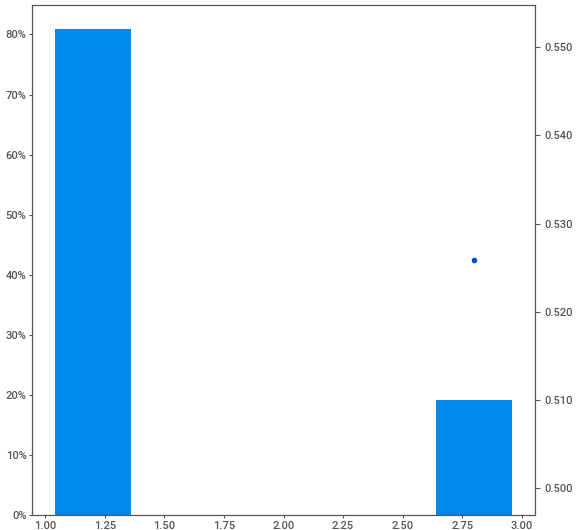
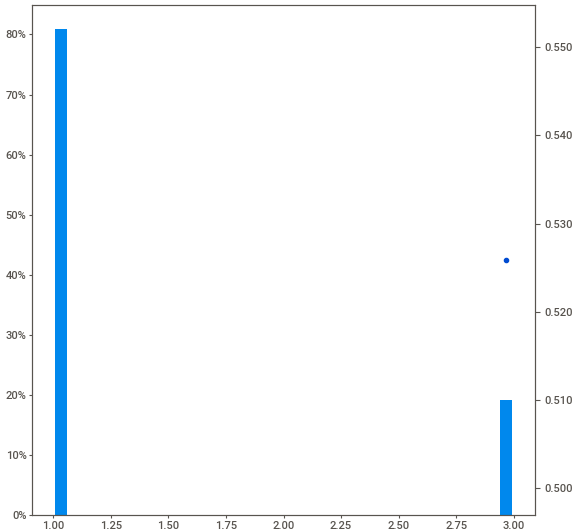
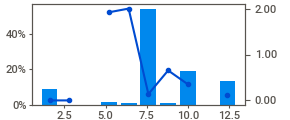
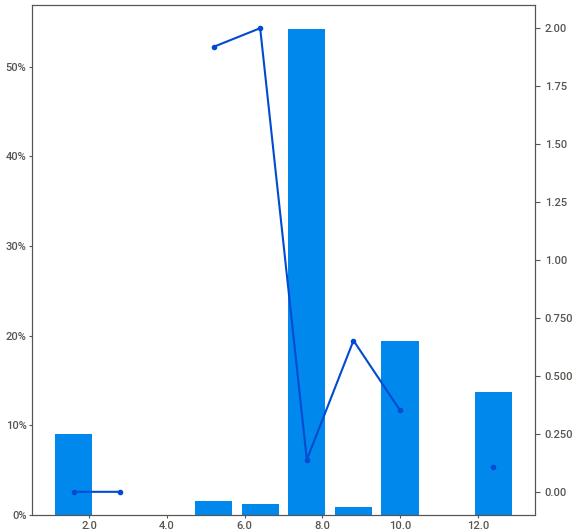
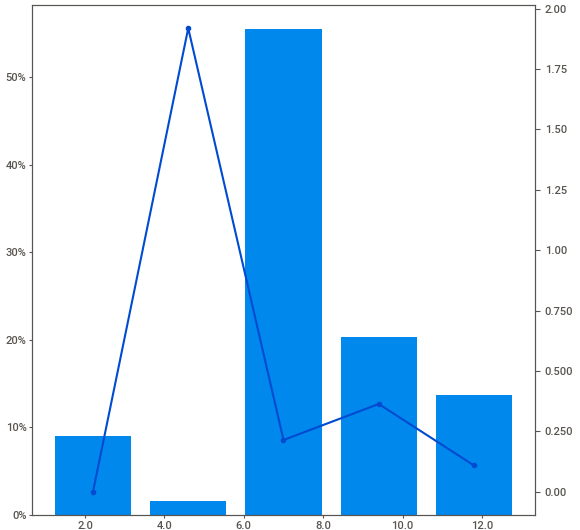
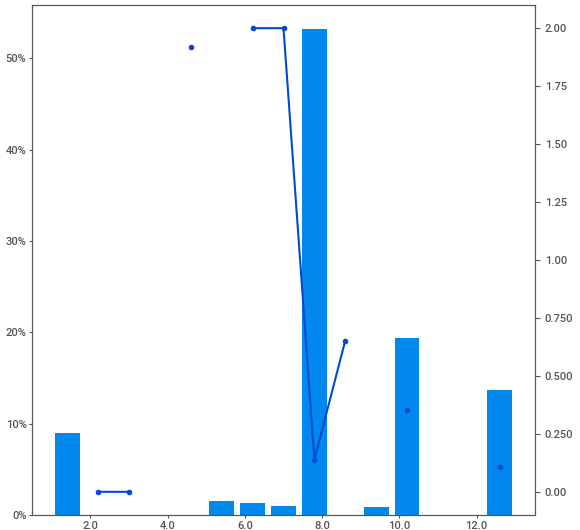
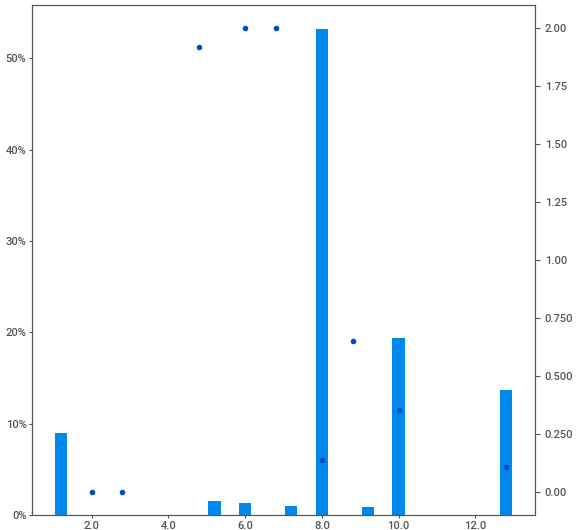
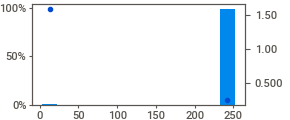
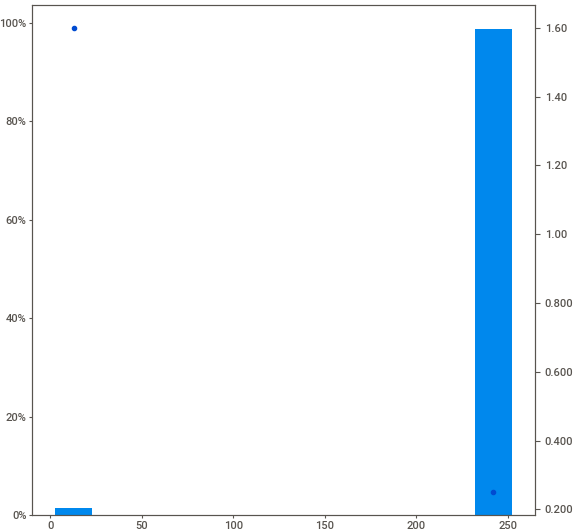
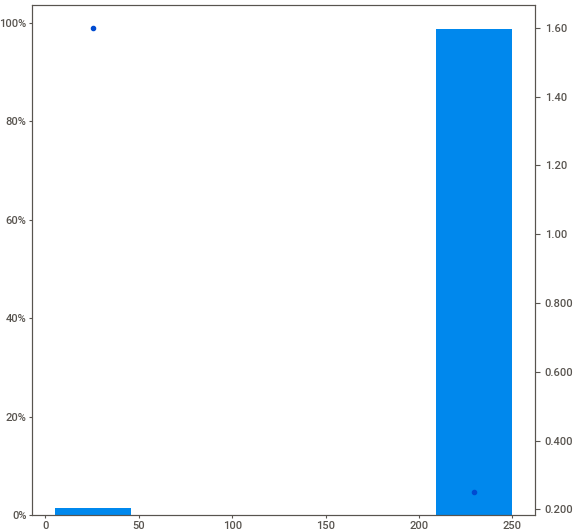
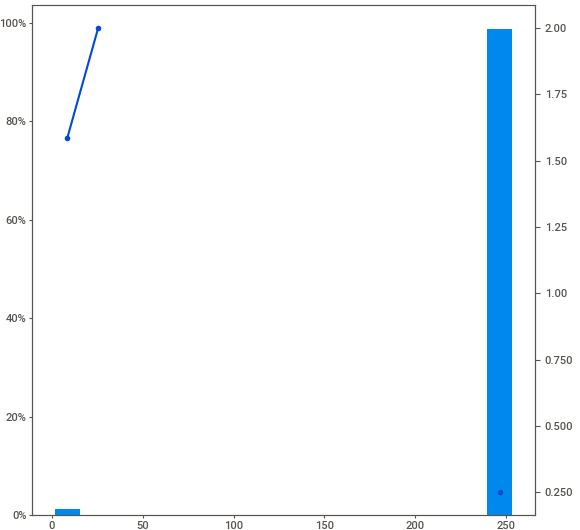
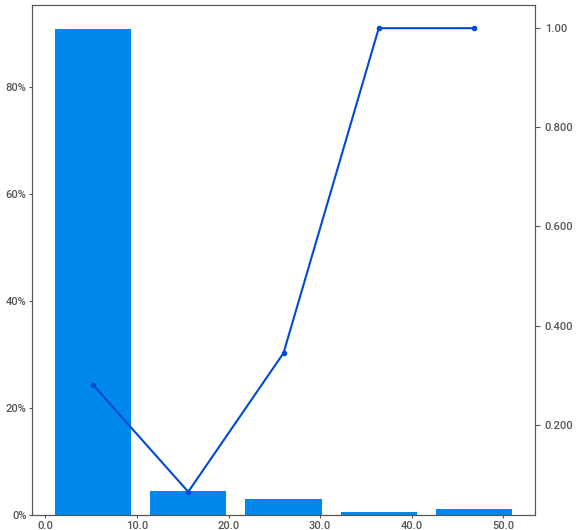
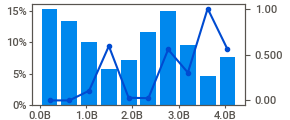
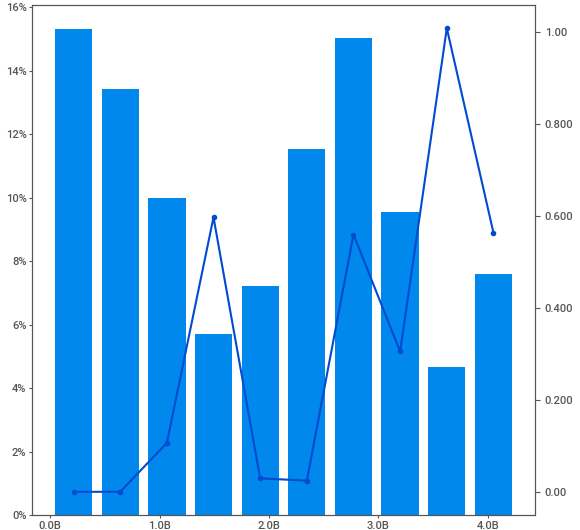
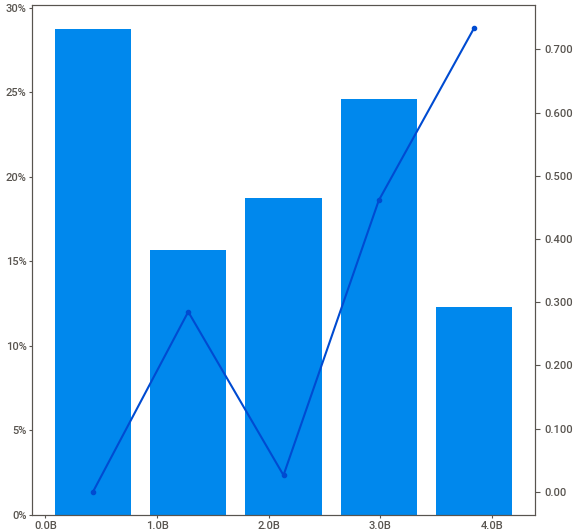
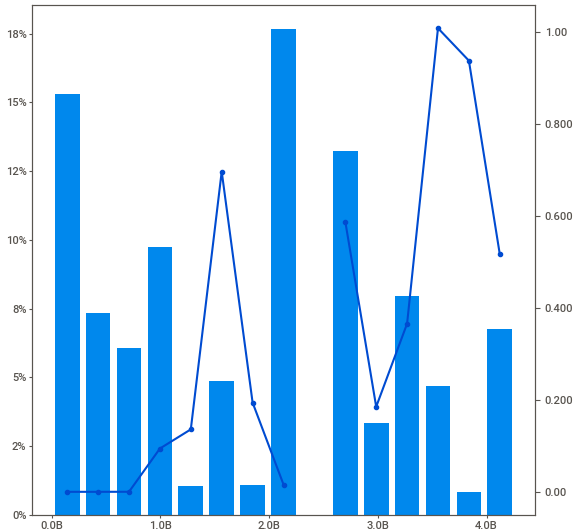
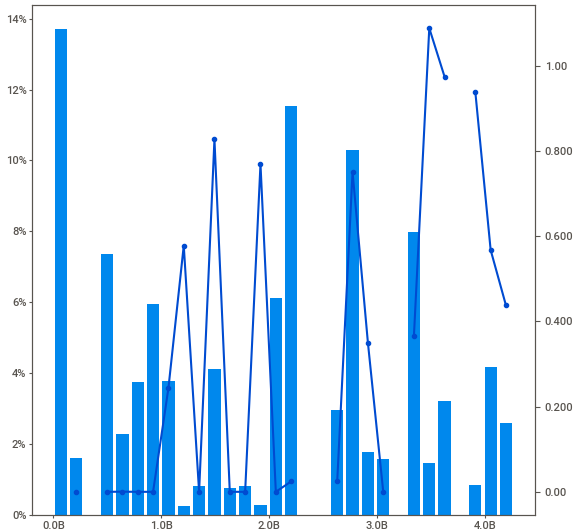
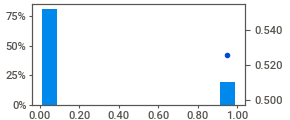
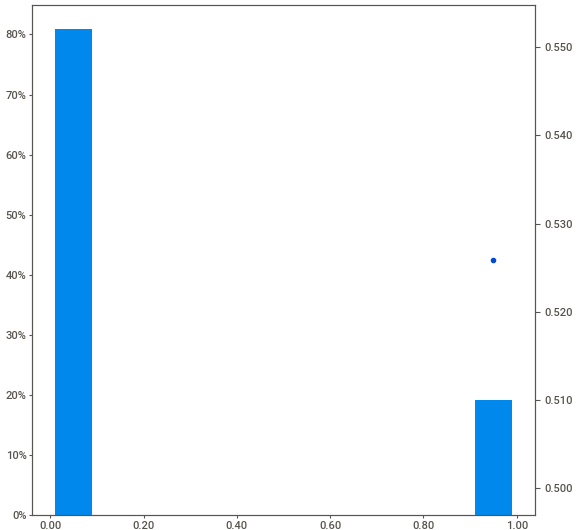
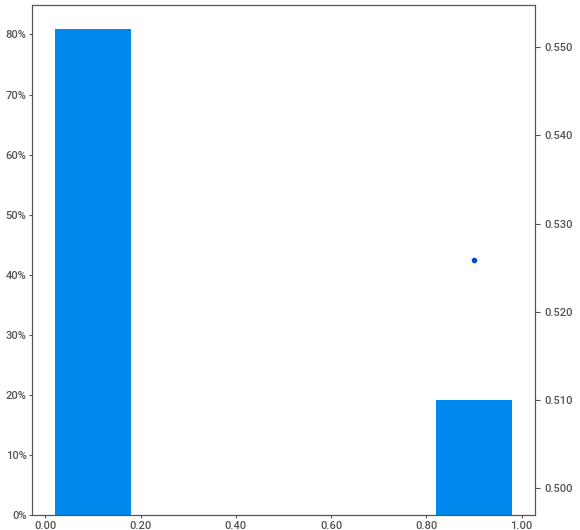
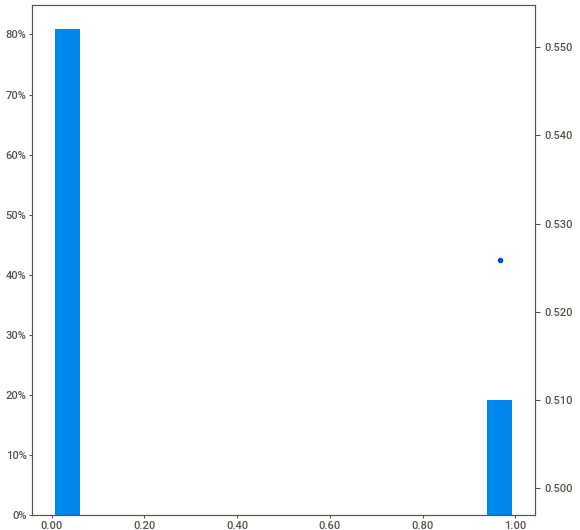
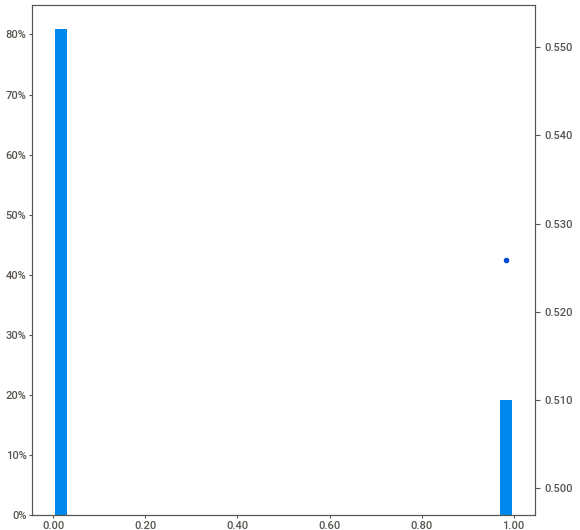
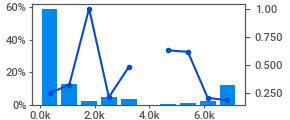
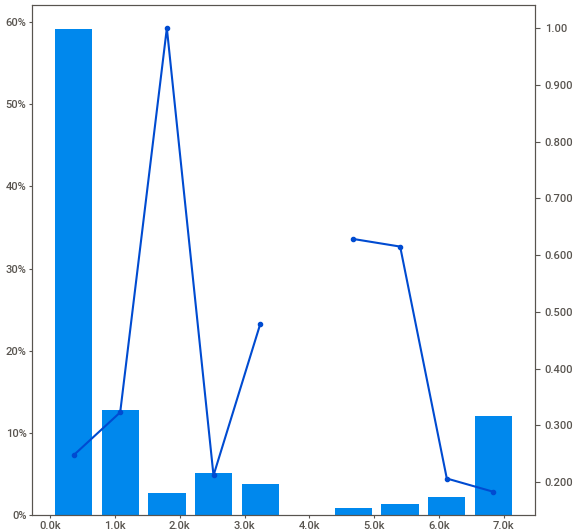
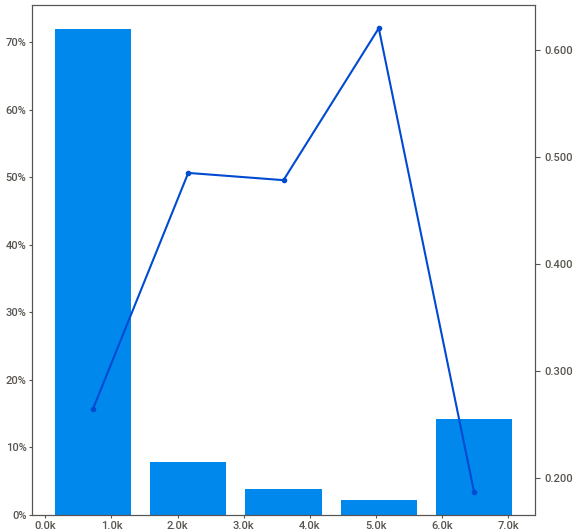
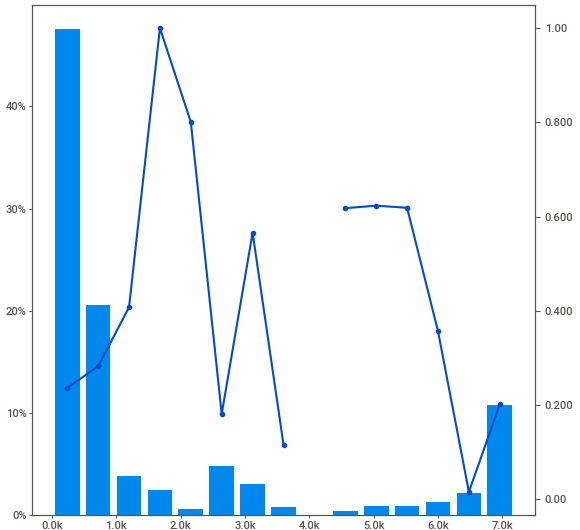
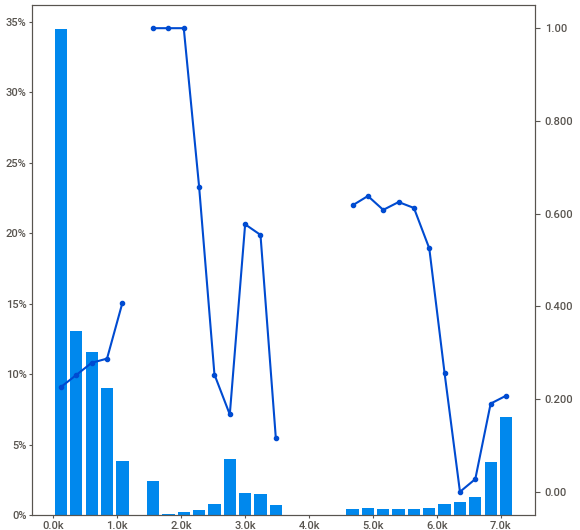
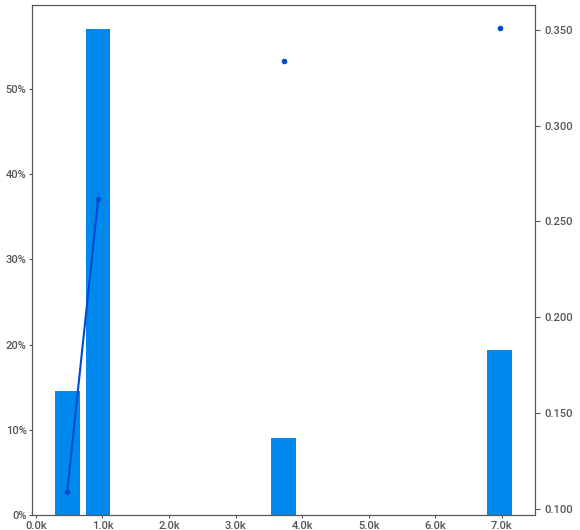
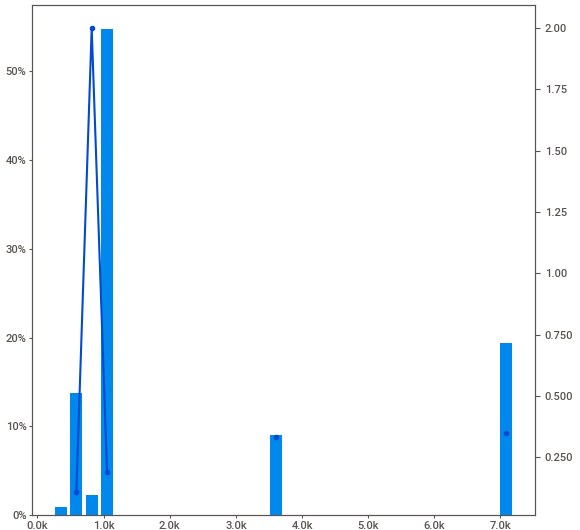
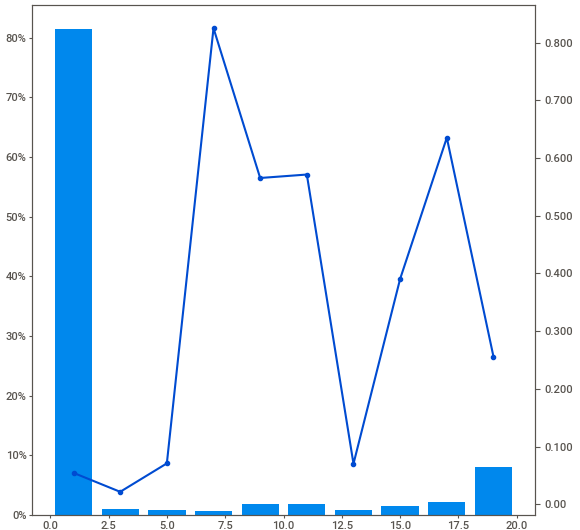
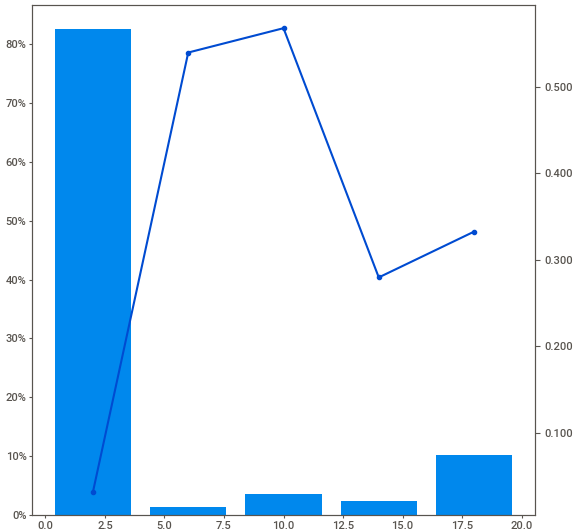
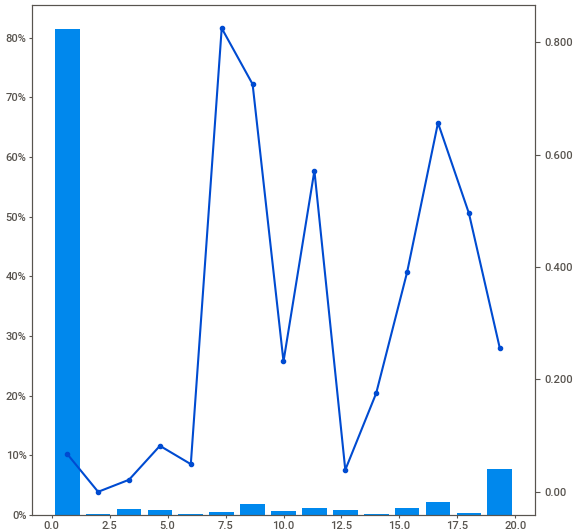
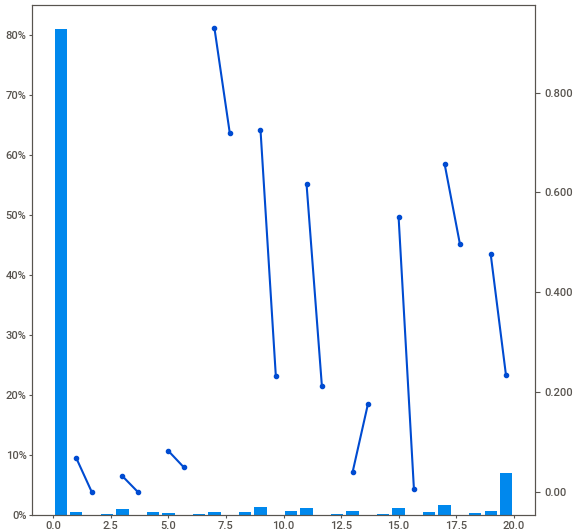
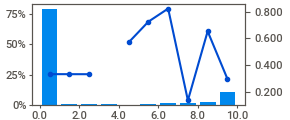
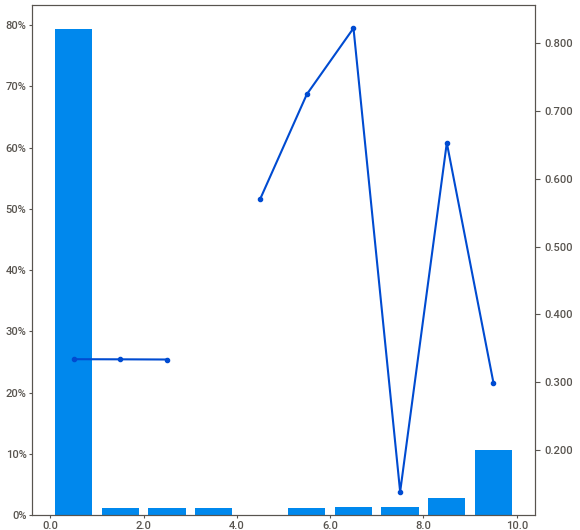
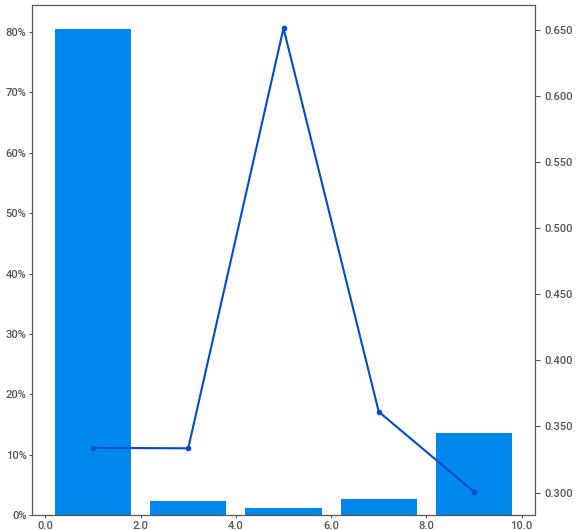
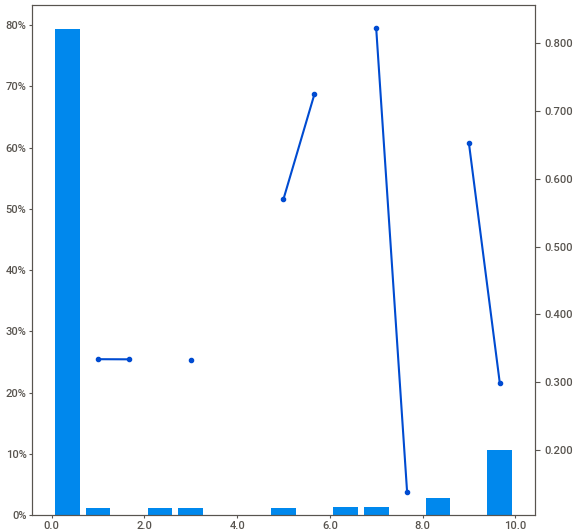
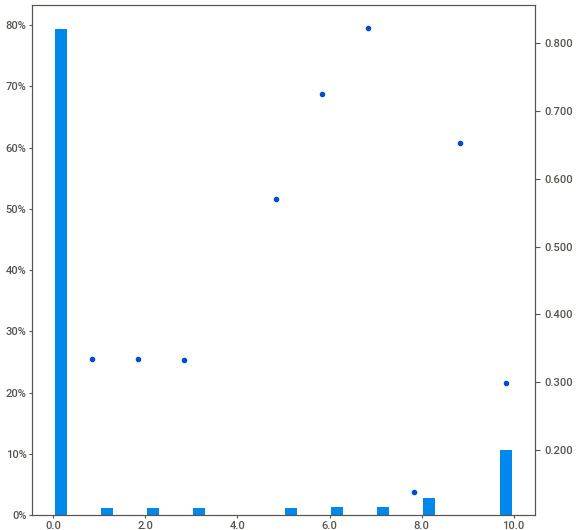
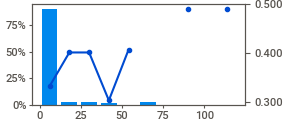
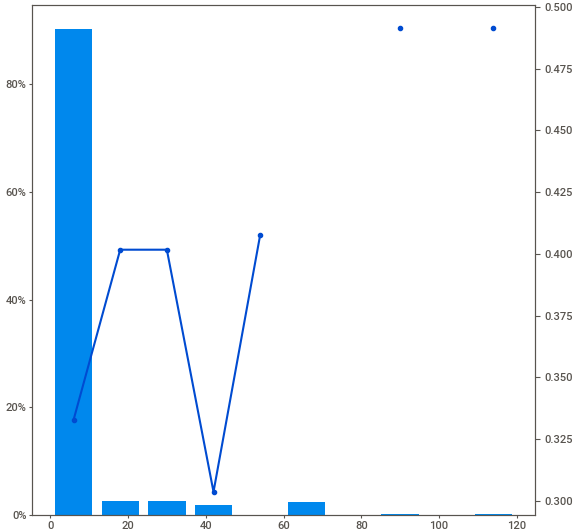
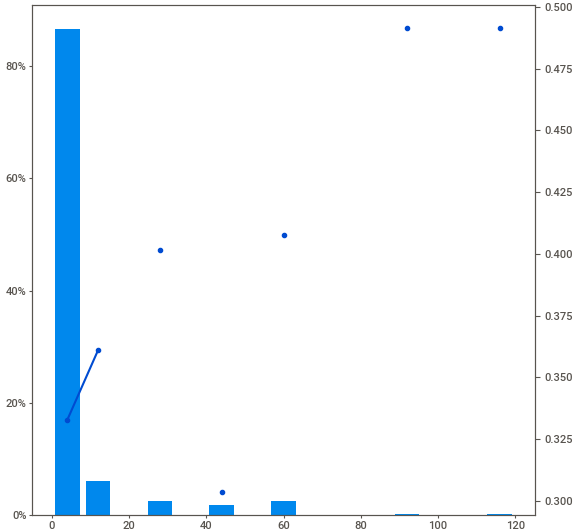
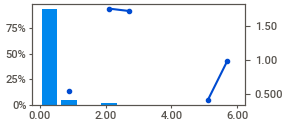
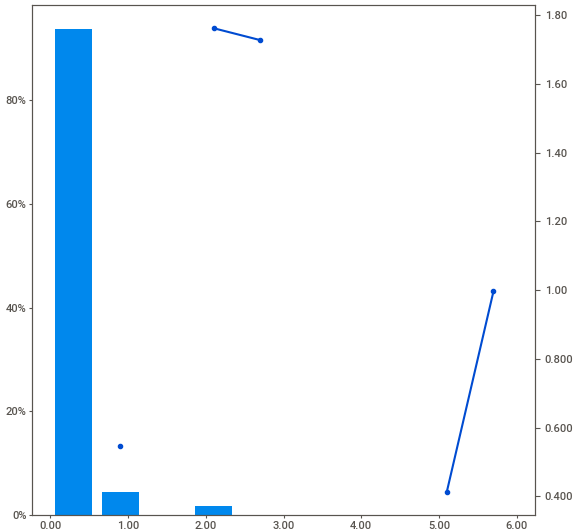
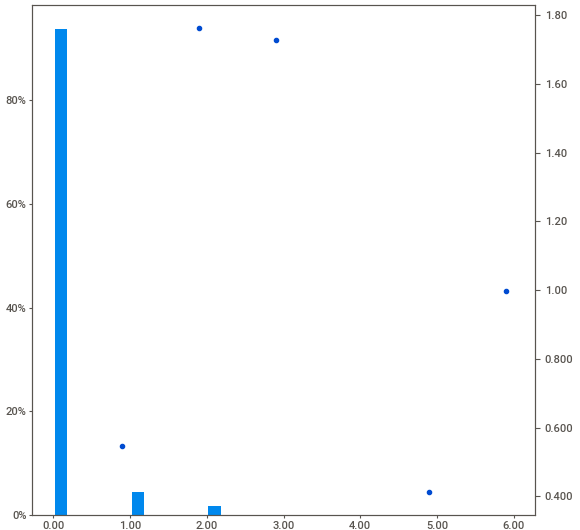
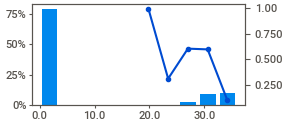
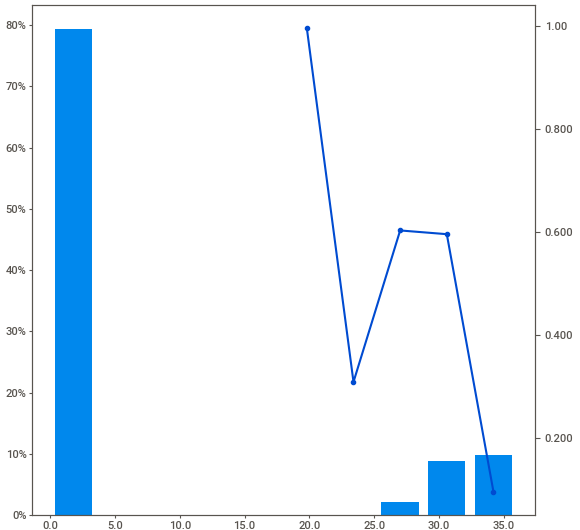
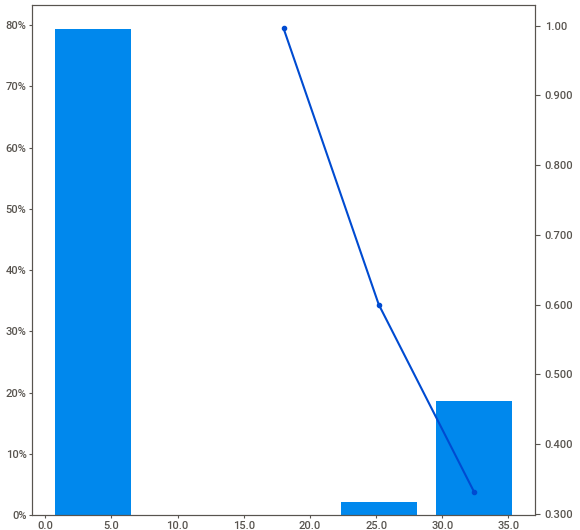
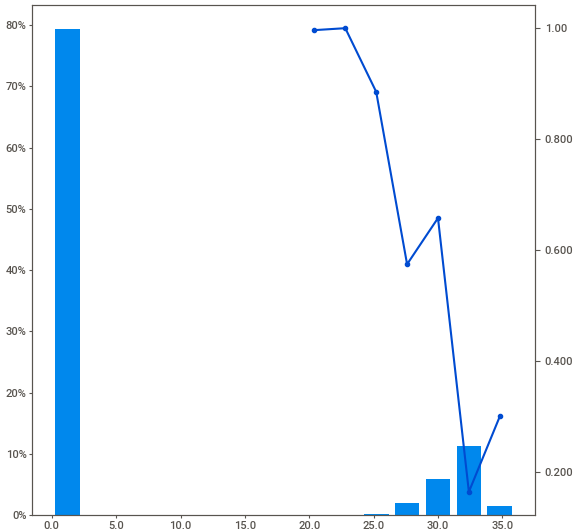
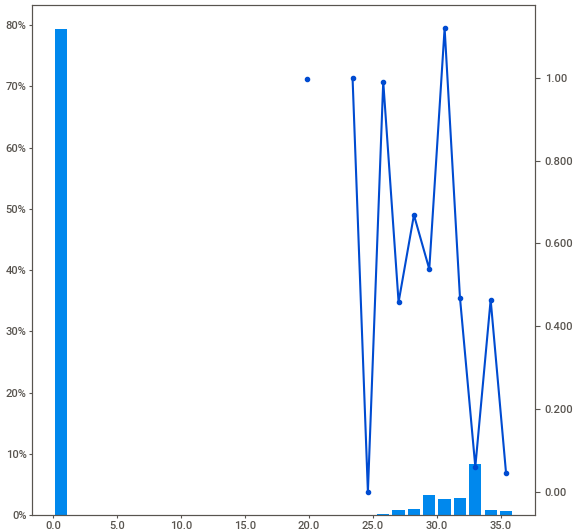
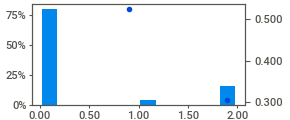
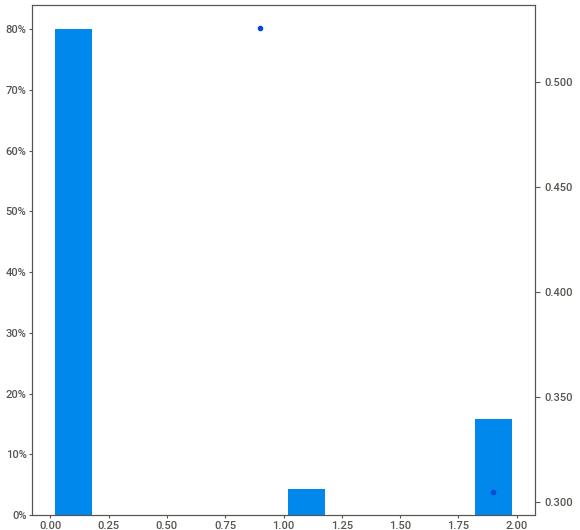
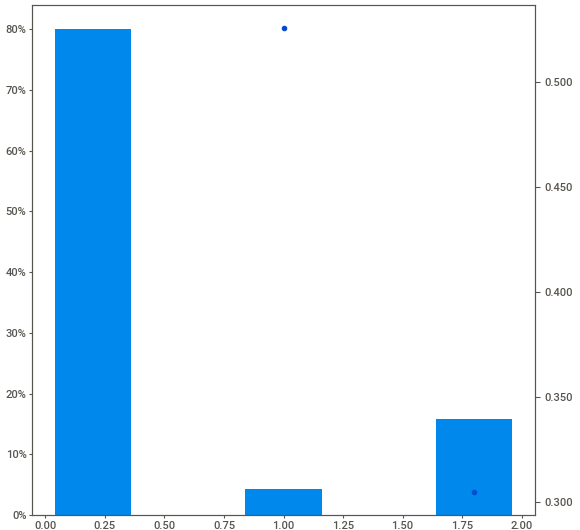
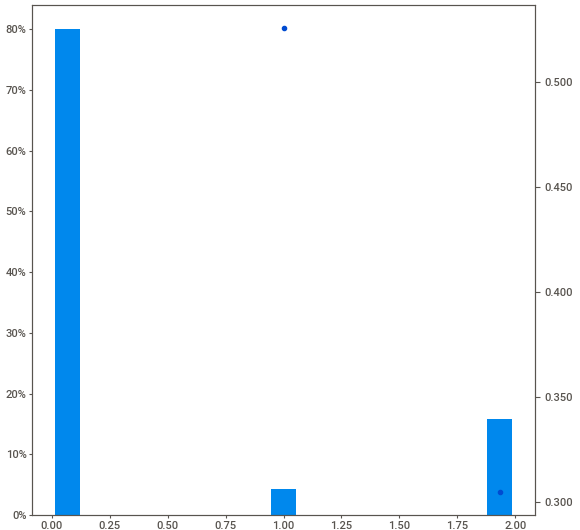
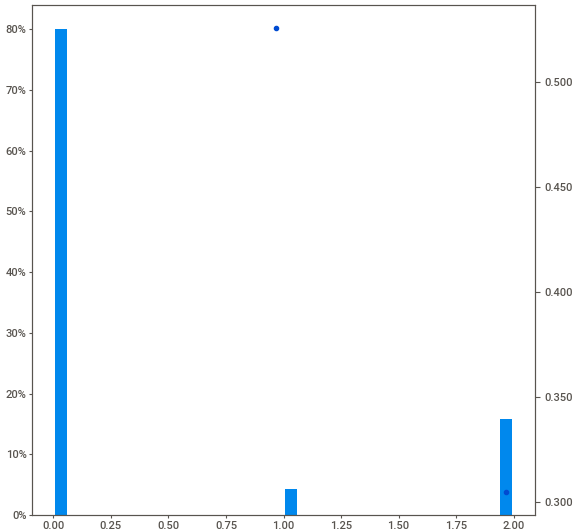
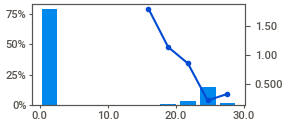
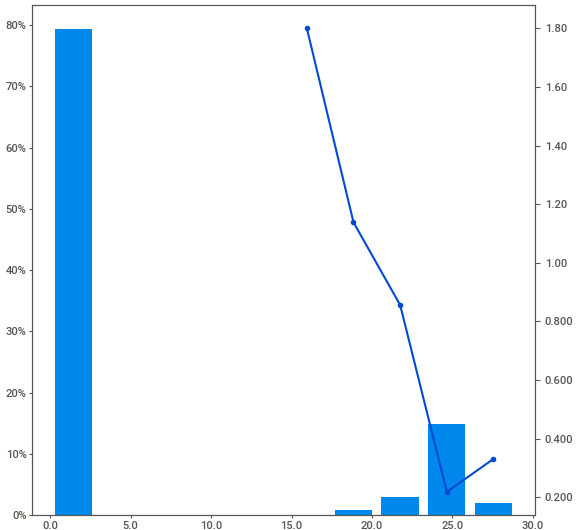
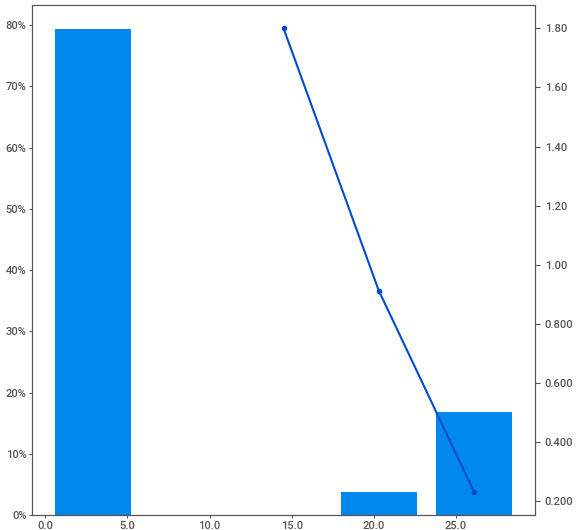
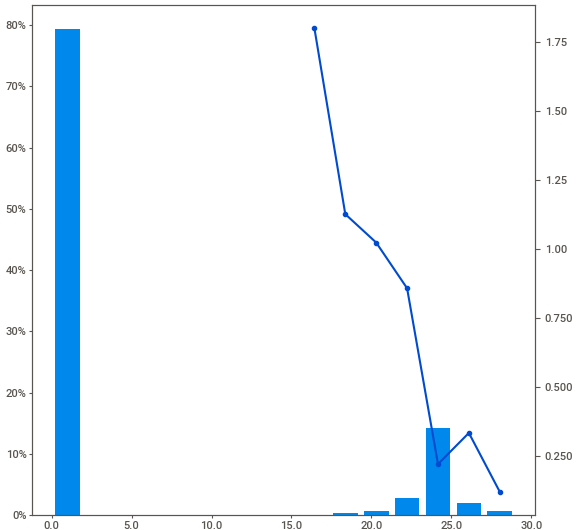
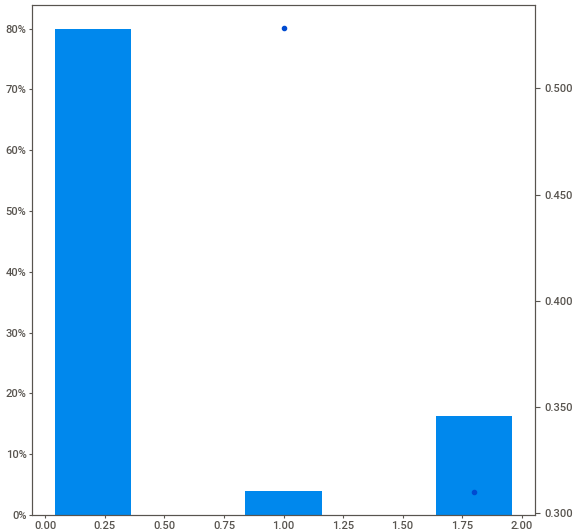
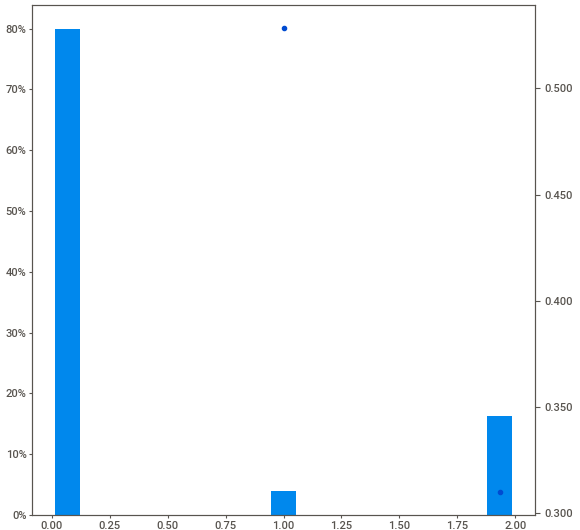
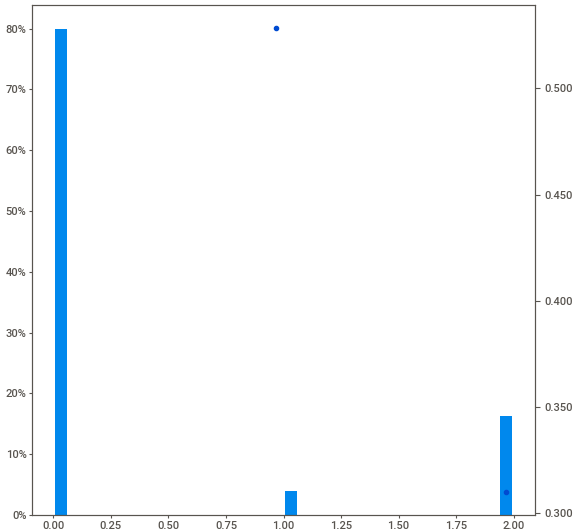
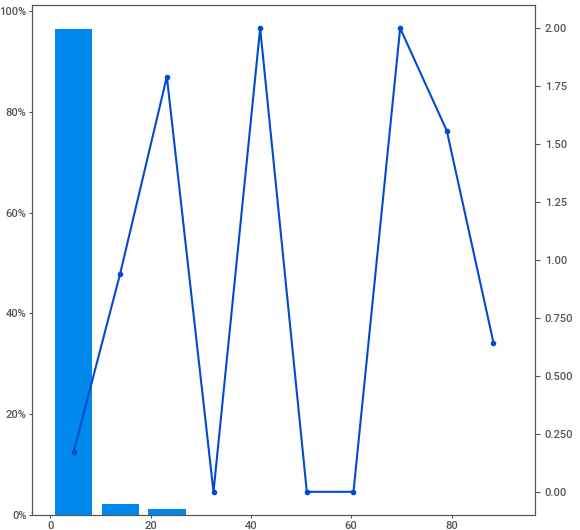
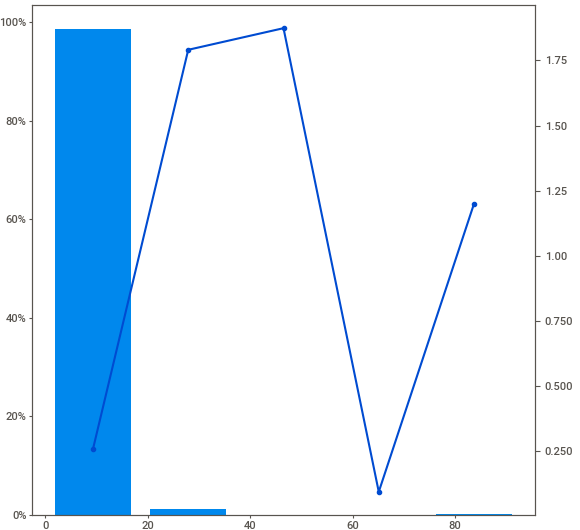
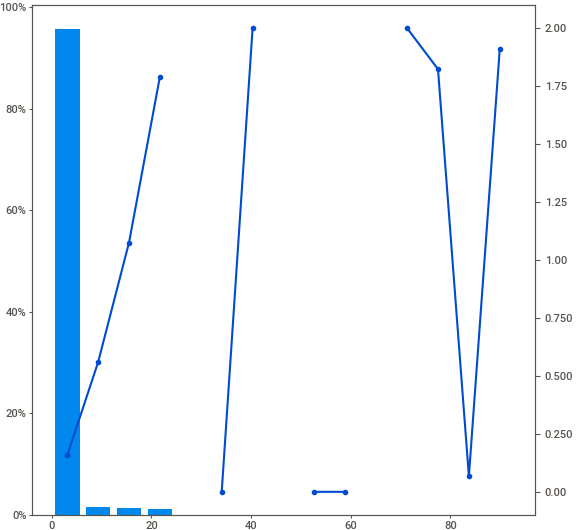
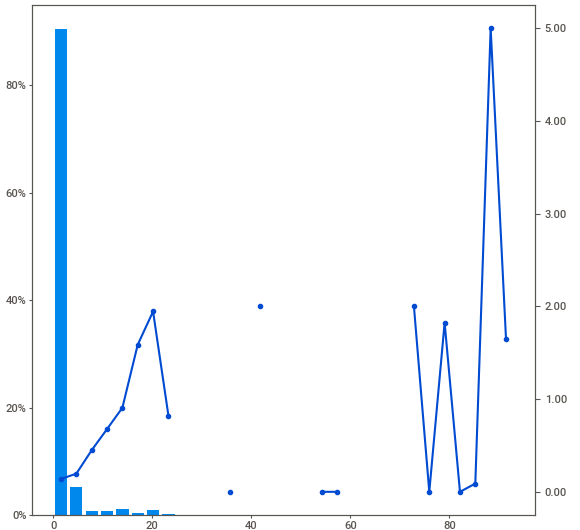
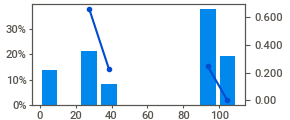
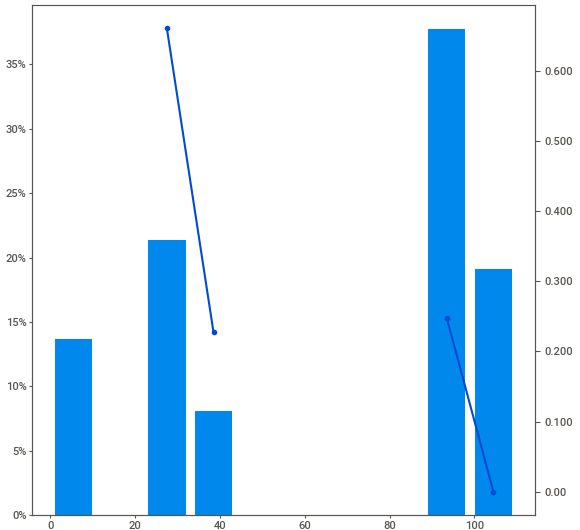
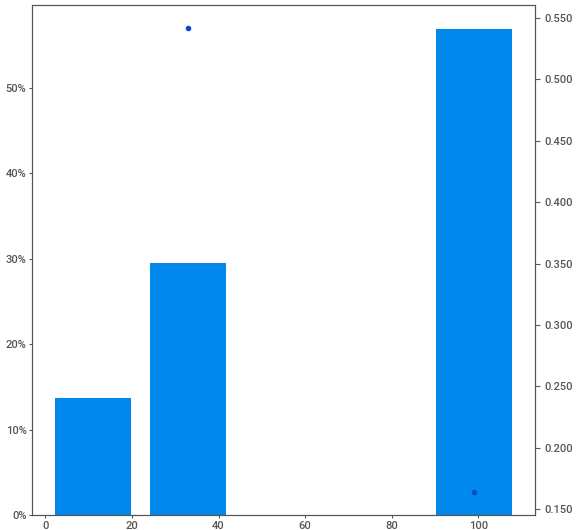
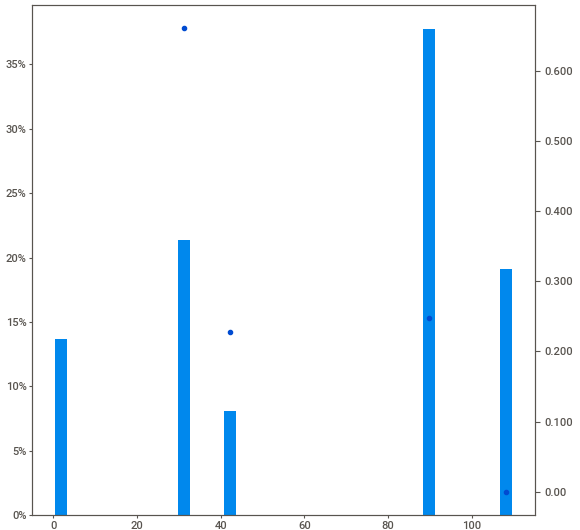
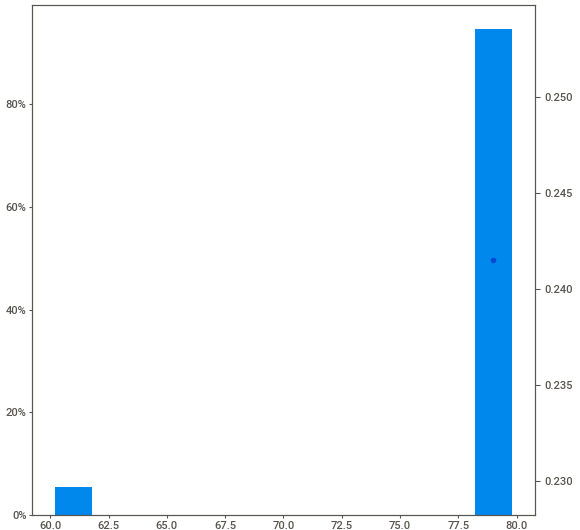
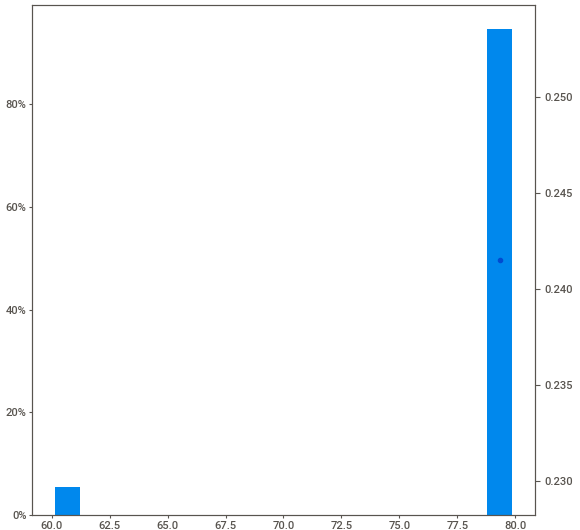
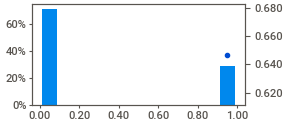
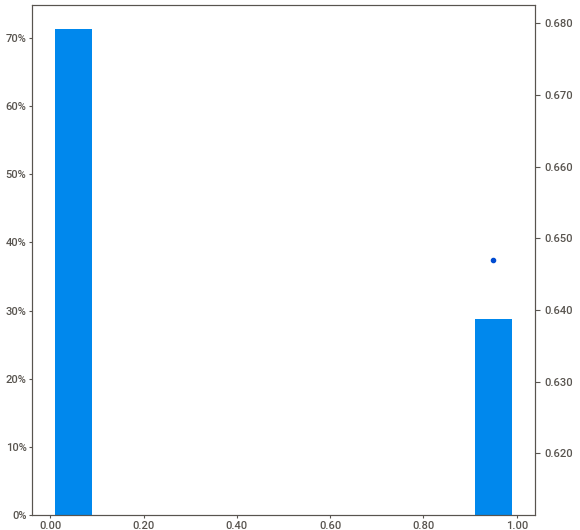
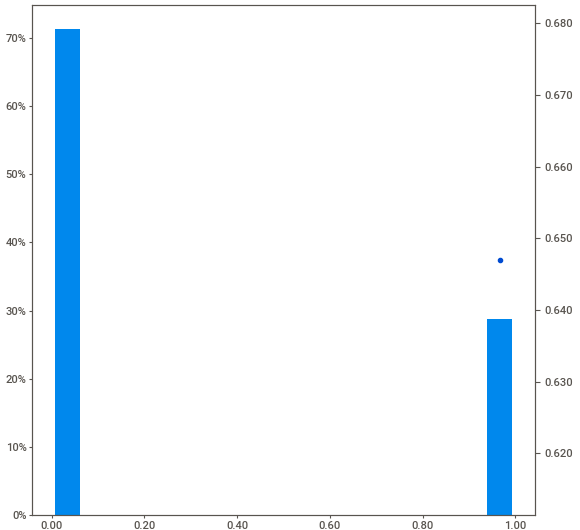
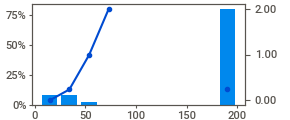
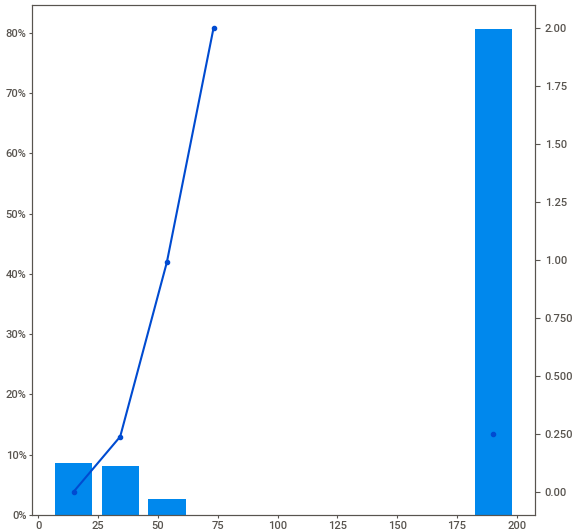
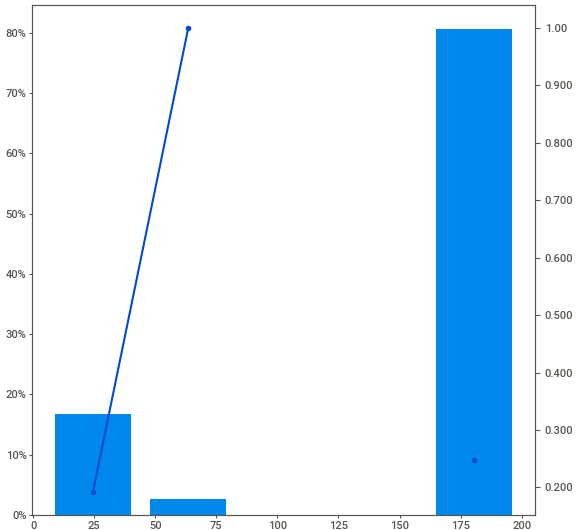
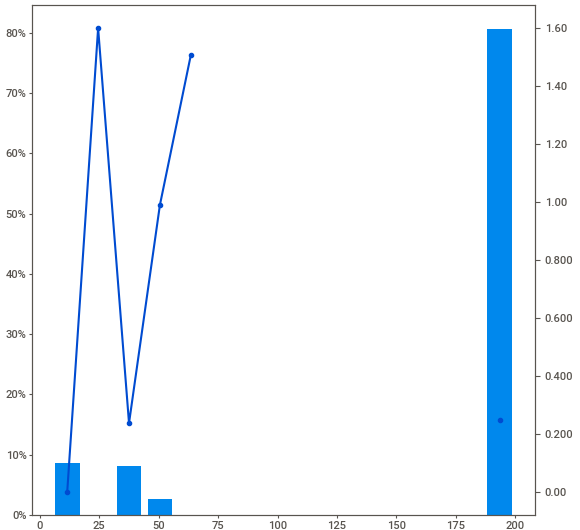
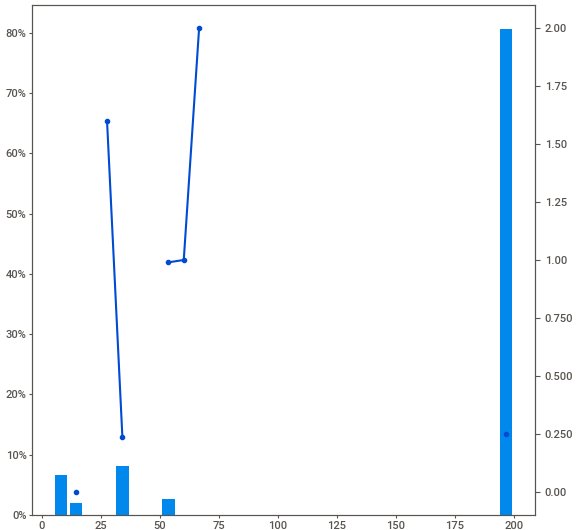
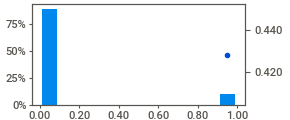
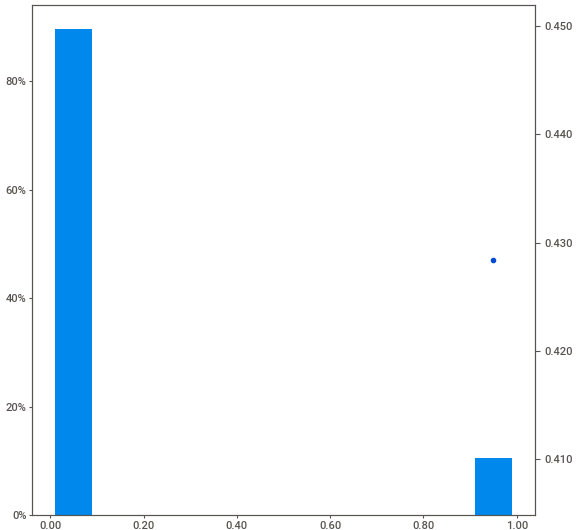
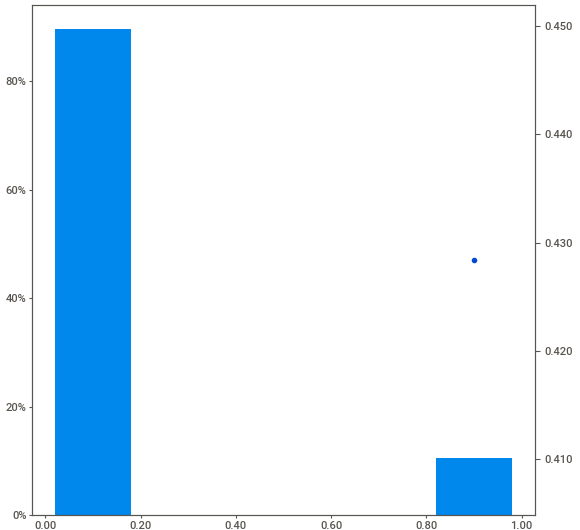
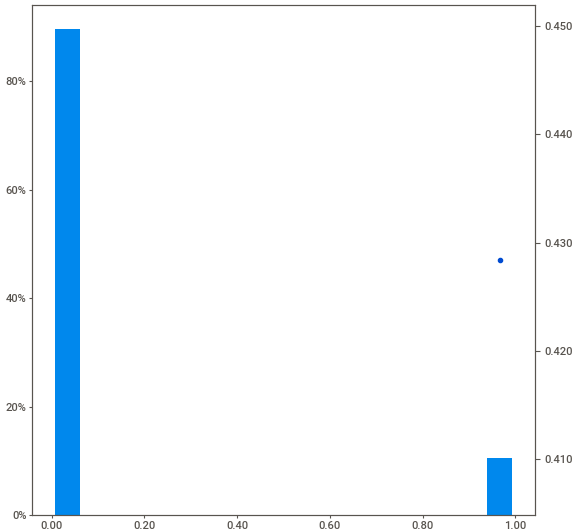
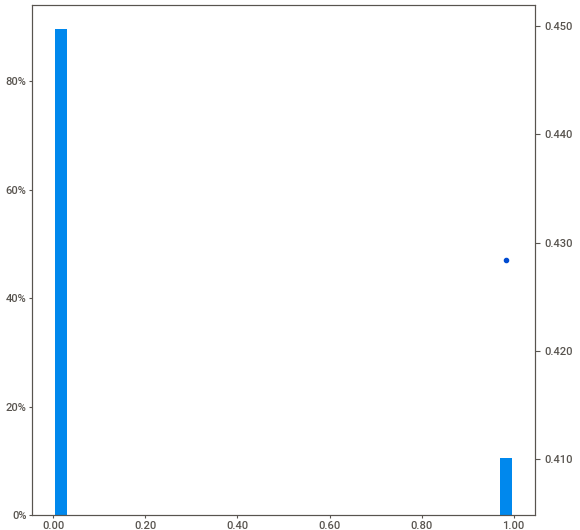
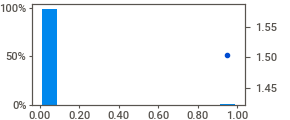
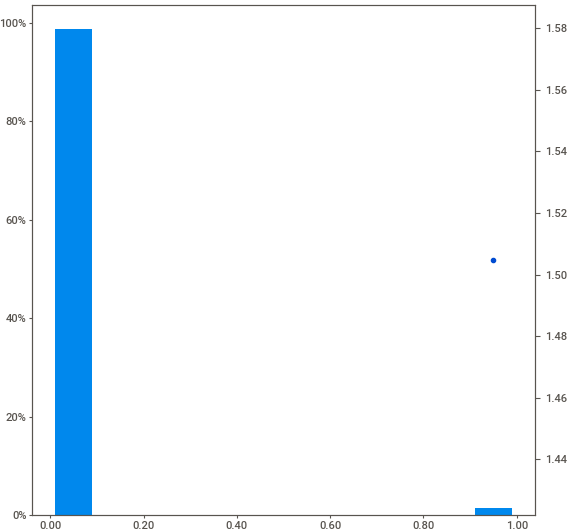
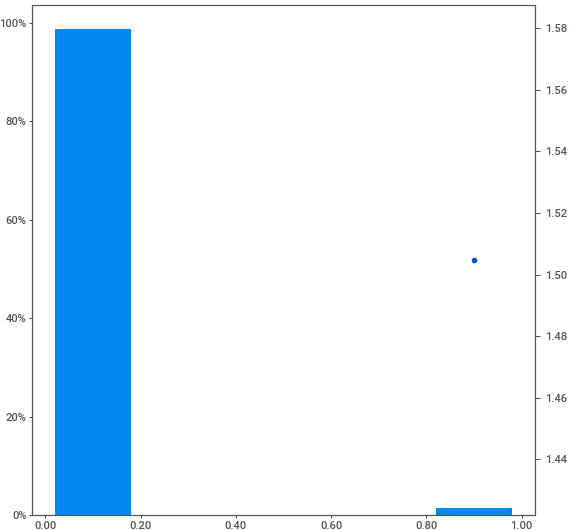
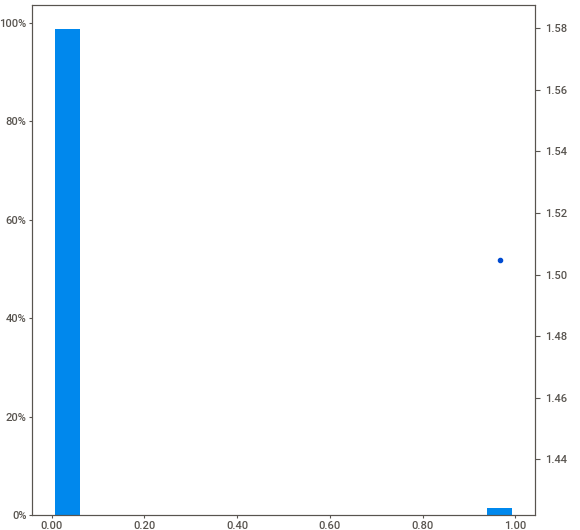
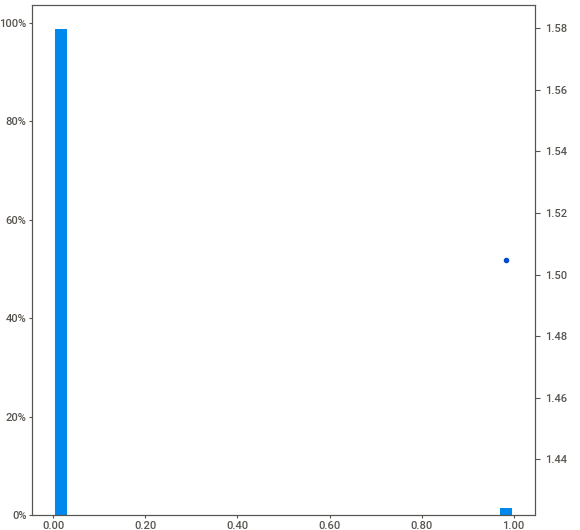
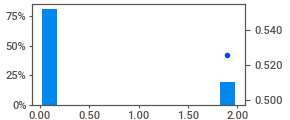
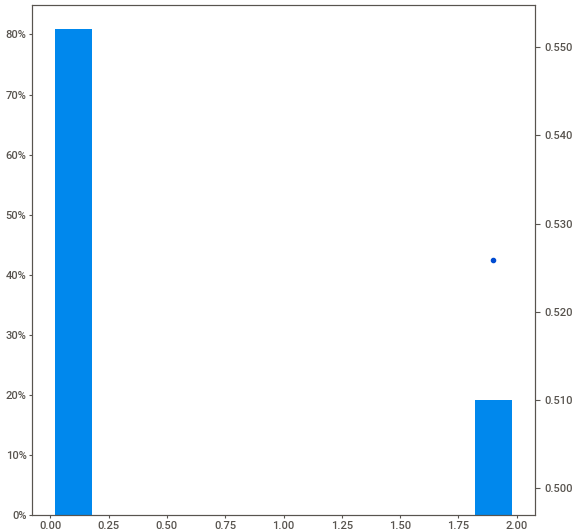
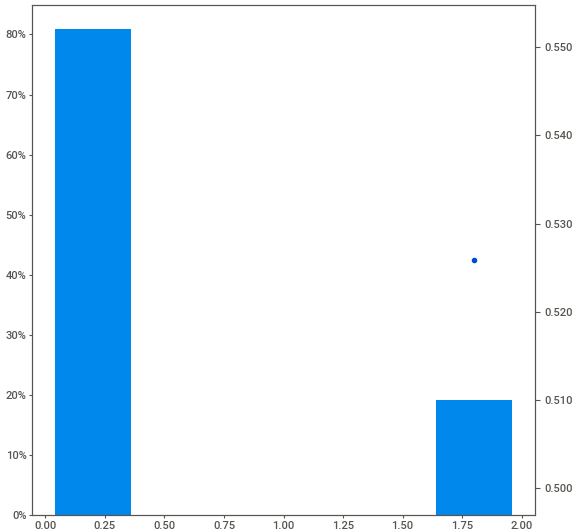
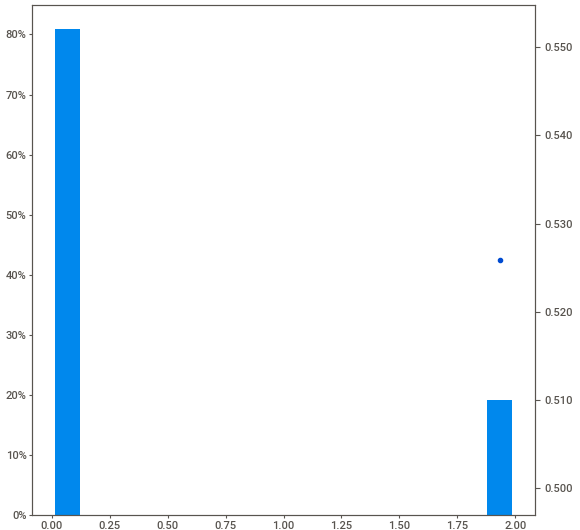
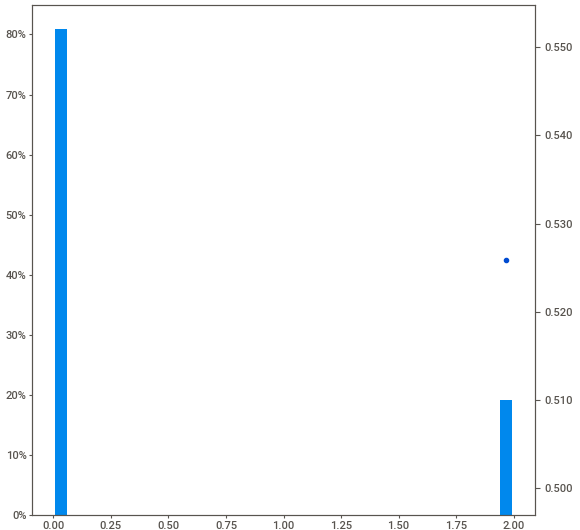
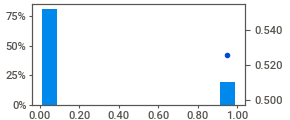
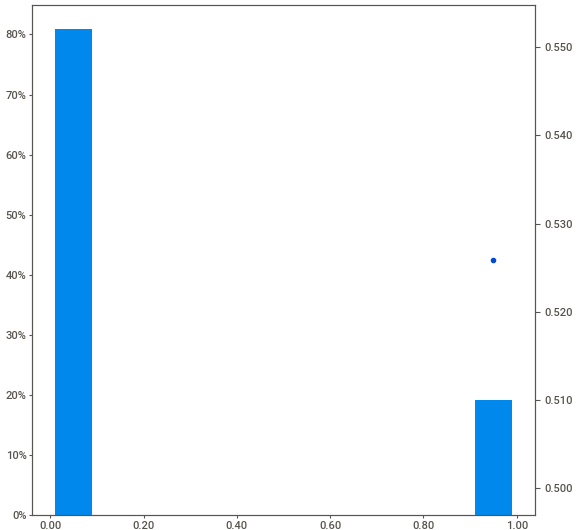
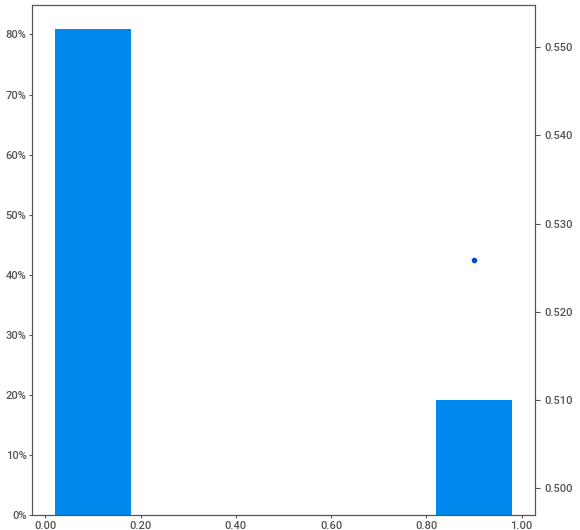
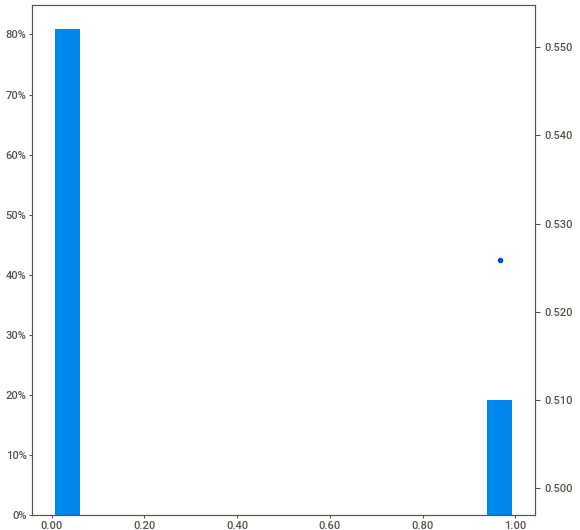
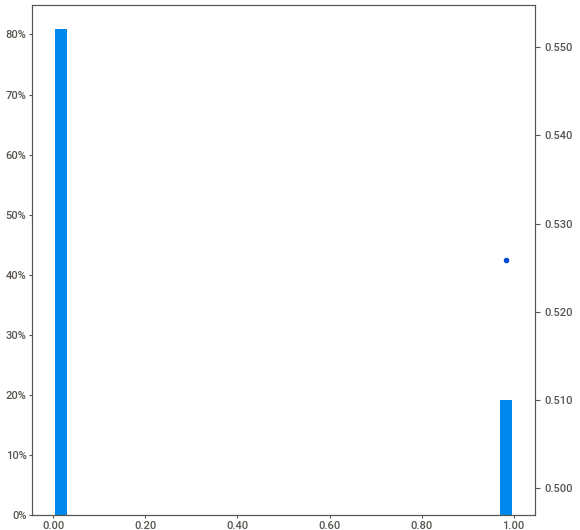
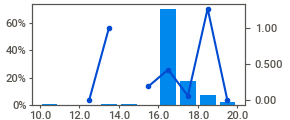
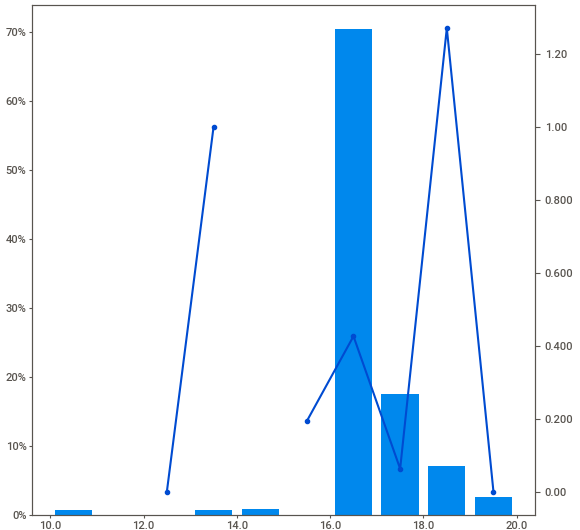
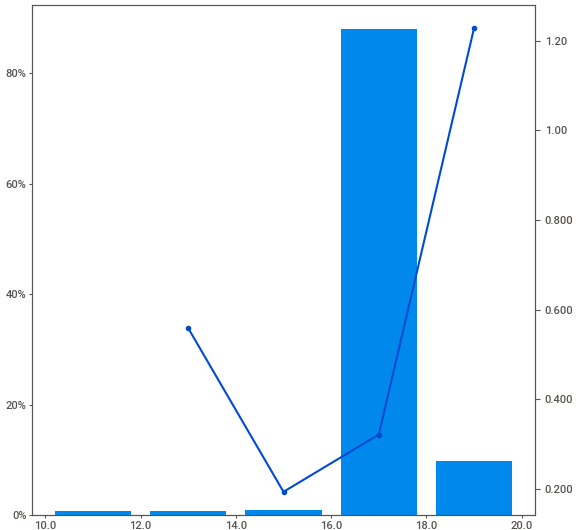
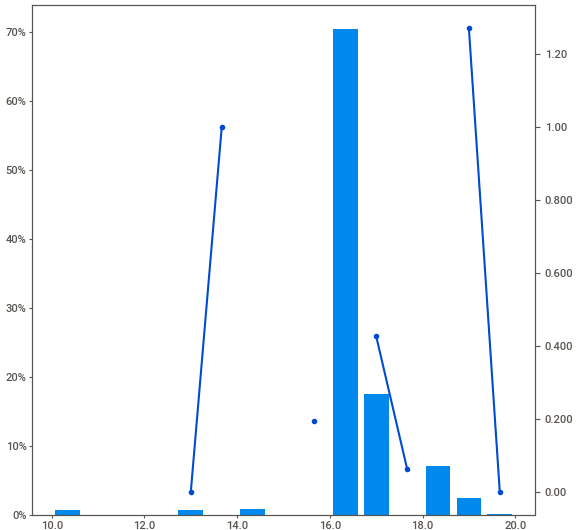
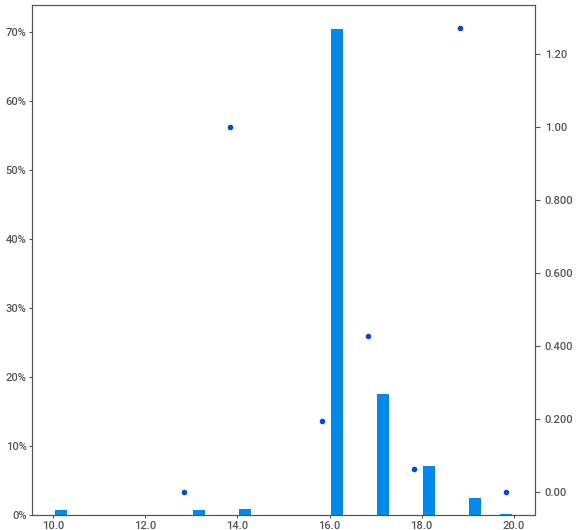
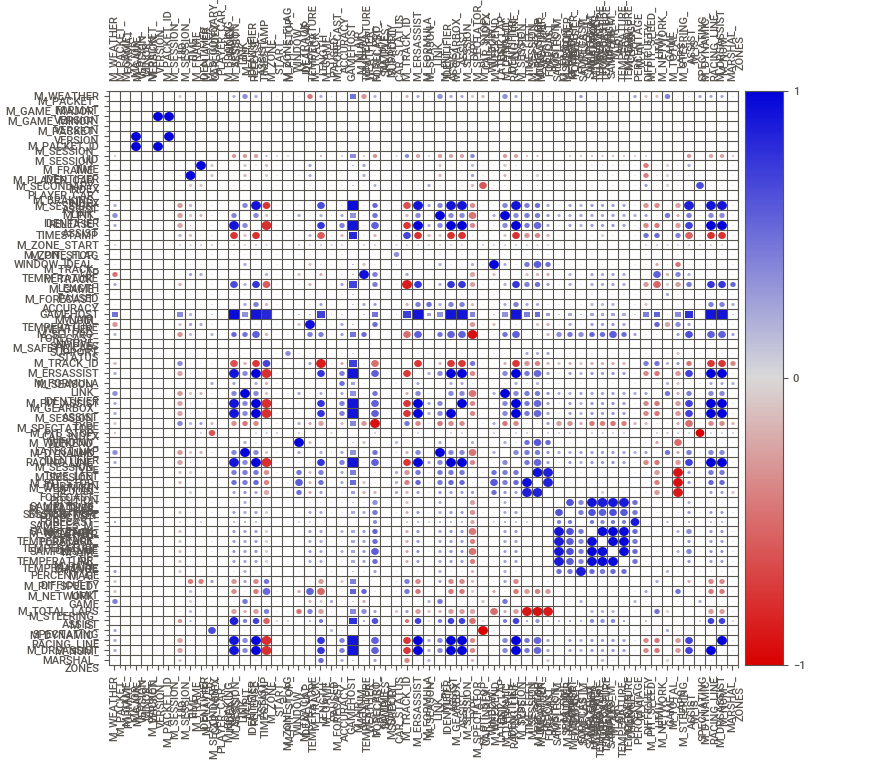
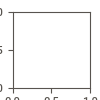

In [14]:
report.show_notebook()